(25, 12140)
(7, 12140)
(32, 12141)
(32, 12879)
(32, 39823)
(25, 39822)
(7, 39822)


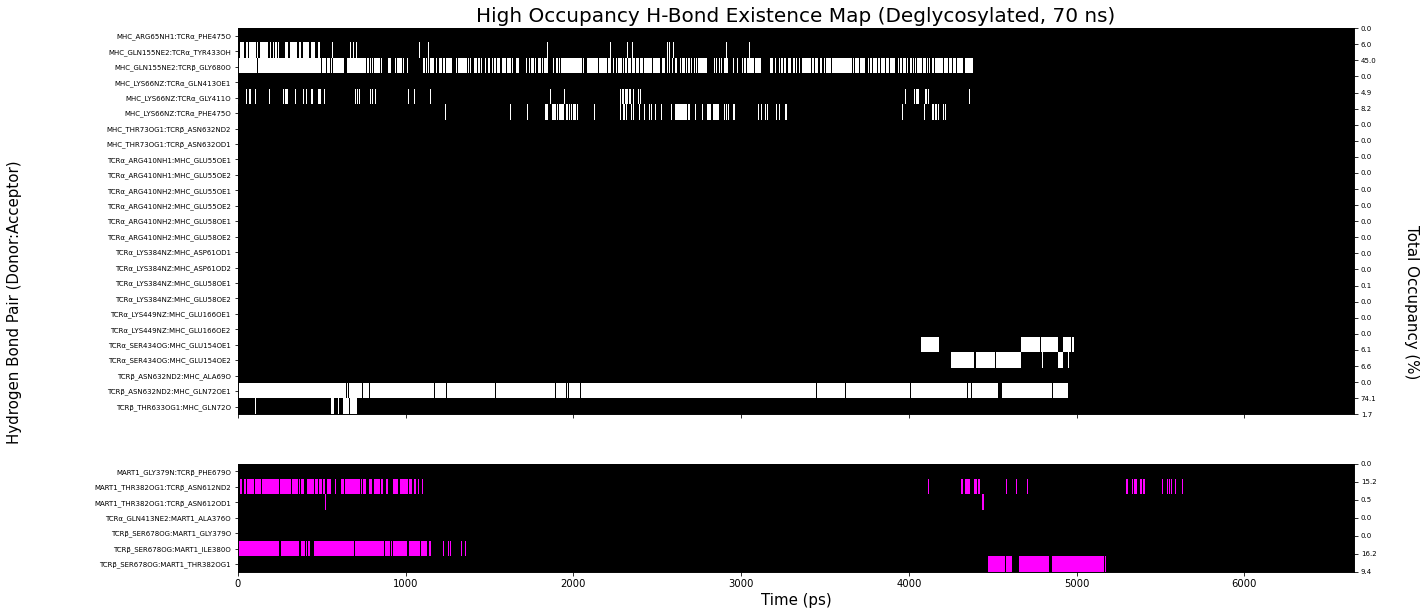

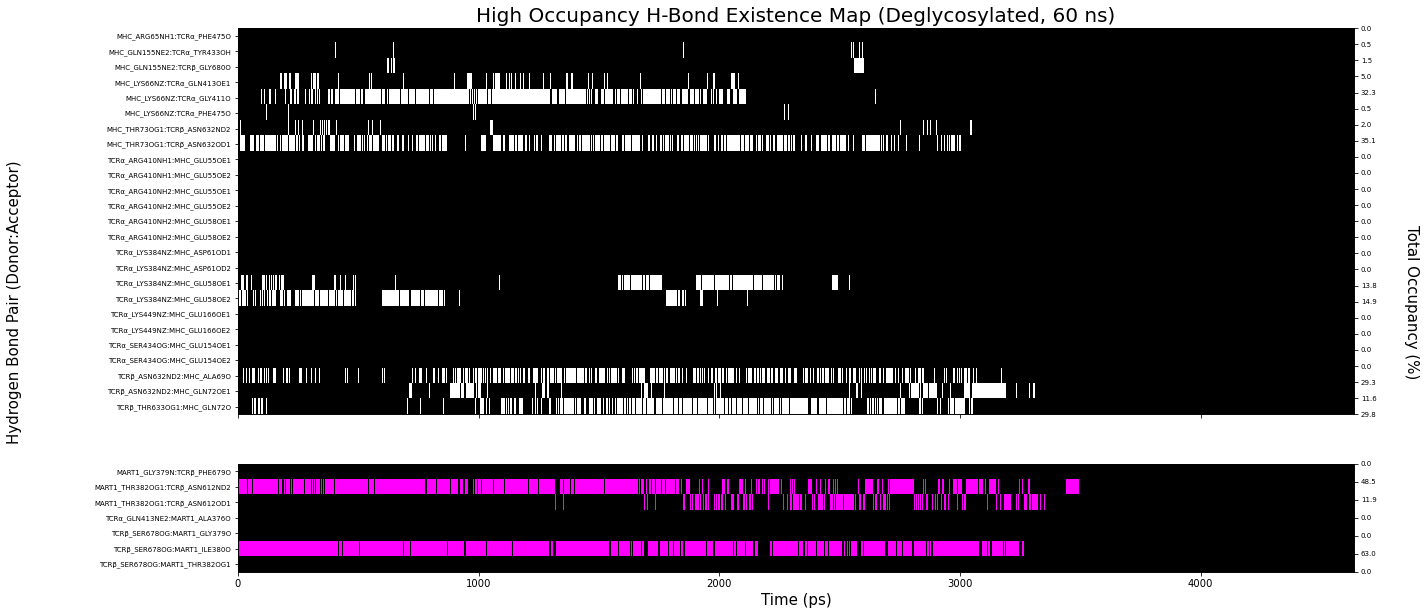

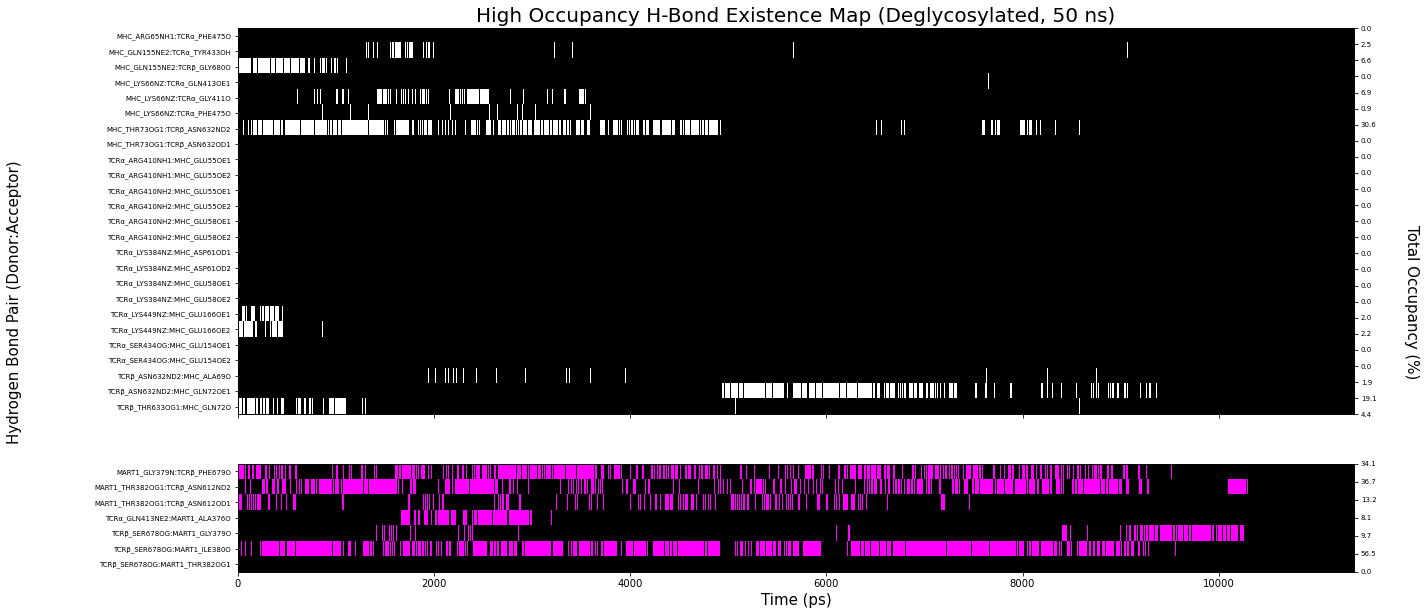

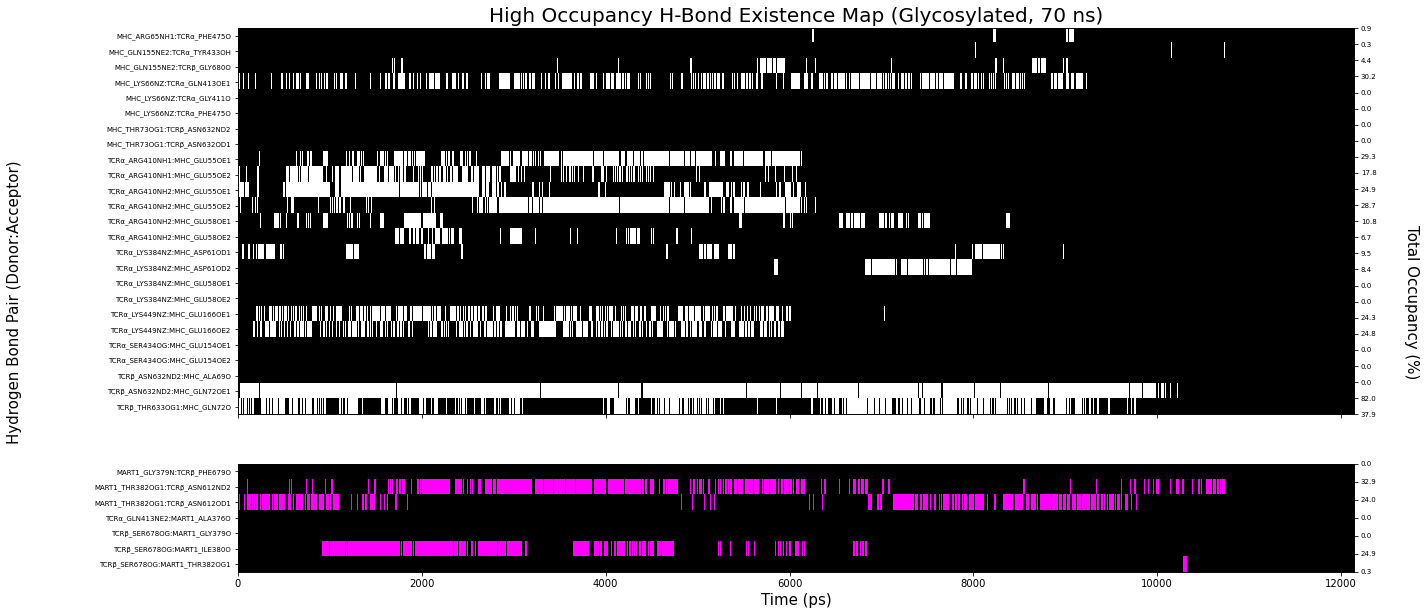

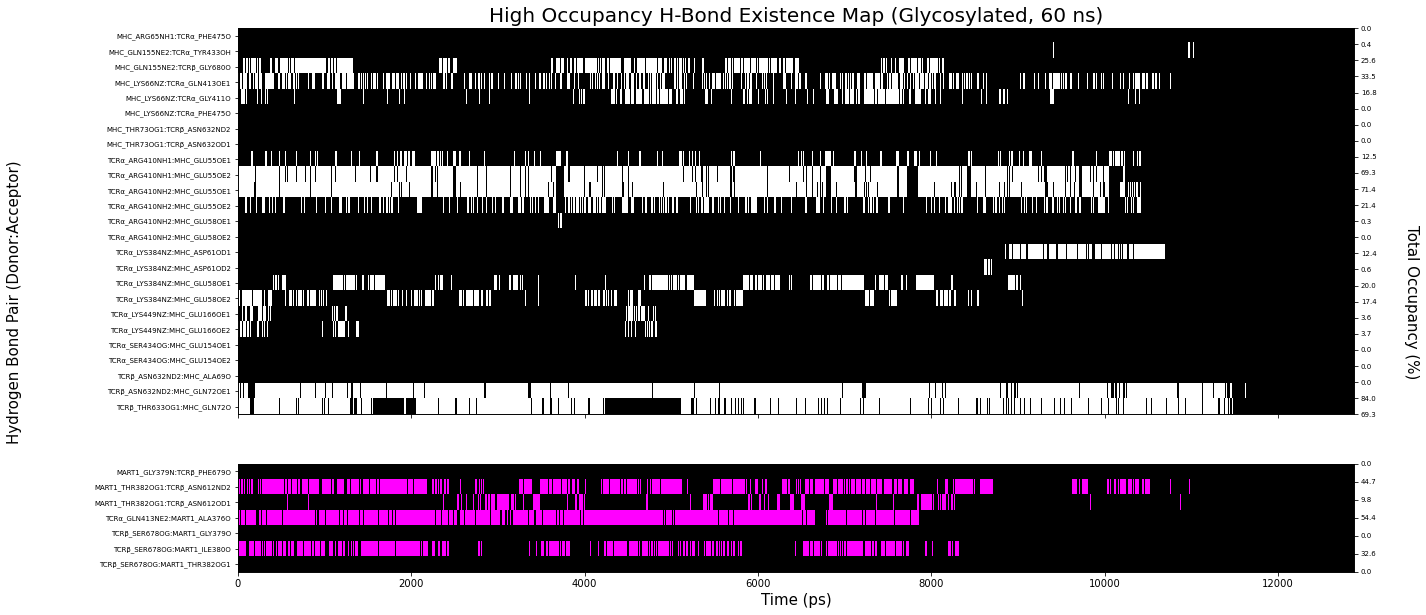

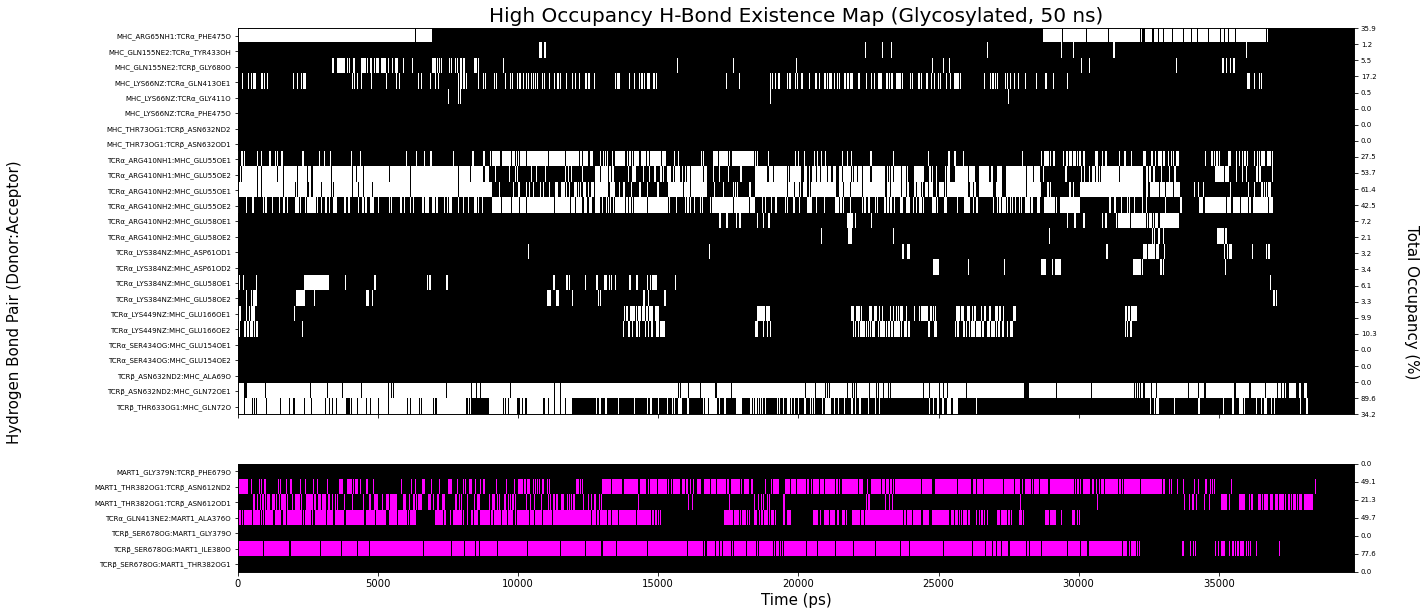

In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#Let's map it up, homie!

M1_100 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/hmap.csv', index_col = 0, header=None)
M1_95 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/hmap.csv', index_col = 0, header=None)
M1_90 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/hmap.csv', index_col = 0, header=None)
                      
GVA_100 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/hmap.csv', index_col = 0, header=None)
GVA_95 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/hmap.csv', index_col = 0, header=None)         
GVA_90 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/hmap.csv', index_col = 0, header=None)
                       

#High Occupancy (>5%)
M1_100['Total Occupancy (%)'] = M1_100.mean(axis=1).round(decimals=3)
M1_100['Total Occupancy (%)'] = 100*M1_100['Total Occupancy (%)']
M1_100_5 = M1_100[M1_100['Total Occupancy (%)']> 5]

M1_95['Total Occupancy (%)'] = M1_95.mean(axis=1).round(decimals=3)
M1_95['Total Occupancy (%)'] = 100*M1_95['Total Occupancy (%)']
M1_95_5 = M1_95[M1_95['Total Occupancy (%)']> 5]

M1_90['Total Occupancy (%)'] = M1_90.mean(axis=1).round(decimals=3)
M1_90['Total Occupancy (%)'] = 100*M1_90['Total Occupancy (%)']
M1_90_5 = M1_90[M1_90['Total Occupancy (%)']>5]

GVA_100['Total Occupancy (%)'] = GVA_100.mean(axis=1).round(decimals=3)
GVA_100['Total Occupancy (%)'] = 100*GVA_100['Total Occupancy (%)']
GVA_100_5 = GVA_100[GVA_100['Total Occupancy (%)']> 5]

GVA_95['Total Occupancy (%)'] = GVA_95.mean(axis=1).round(decimals=3)
GVA_95['Total Occupancy (%)'] = 100*GVA_95['Total Occupancy (%)']
GVA_95_5 = GVA_95[GVA_95['Total Occupancy (%)']> 5]

GVA_90['Total Occupancy (%)'] = GVA_90.mean(axis=1).round(decimals=3)
GVA_90['Total Occupancy (%)'] = 100*GVA_90['Total Occupancy (%)']
GVA_90_5 = GVA_90[GVA_90['Total Occupancy (%)']>5]


#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_M95 = pd.Index(M1_95_5.index.tolist())
ndx_M90 = pd.Index(M1_90_5.index.tolist())

ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())
ndx_GVA95 = pd.Index(GVA_95_5.index.tolist())
ndx_GVA90 = pd.Index(GVA_90_5.index.tolist())



#Intra-Mutant Common Indices

###MART1###

#M1 Common Index
M1_100_95= ndx_M95.difference(ndx_M100, sort=False).tolist()
M1_100_90= ndx_M90.difference(ndx_M100, sort=False).tolist()
M1_100_diff = list(set(M1_100_95+M1_100_90))
M1_95_100 = ndx_M100.difference(ndx_M95, sort=False).tolist()
M1_95_90 = ndx_M90.difference(ndx_M95, sort=False).tolist()
M1_95_diff = list(set(M1_95_100+M1_95_90)) 
M1_90_100 = ndx_M100.difference(ndx_M90, sort=False).tolist()
M1_90_95 = ndx_M95.difference(ndx_M90, sort=False).tolist()
M1_90_diff = list(set(M1_90_100+M1_90_95))

##M1 Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(M1_100_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_100_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_100_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(M1_95_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_95_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_95_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(M1_90_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_90_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_90_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)

###GVA###

#GVA Common Index
GVA_100_95= ndx_GVA95.difference(ndx_GVA100, sort=False).tolist()
GVA_100_90= ndx_GVA90.difference(ndx_GVA100, sort=False).tolist()
GVA_100_diff = list(set(GVA_100_95+GVA_100_90))
GVA_95_100 = ndx_GVA100.difference(ndx_GVA95, sort=False).tolist()
GVA_95_90 = ndx_GVA90.difference(ndx_GVA95, sort=False).tolist()
GVA_95_diff = list(set(GVA_95_100+GVA_95_90)) 
GVA_90_100 = ndx_GVA100.difference(ndx_GVA90, sort=False).tolist()
GVA_90_95 = ndx_GVA95.difference(ndx_GVA90, sort=False).tolist()
GVA_90_diff = list(set(GVA_90_100+GVA_90_95))

##GVA Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(GVA_100_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_100_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_100_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(GVA_95_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_95_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_95_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(GVA_90_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_90_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_90_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)


#Inter-Mutant Common Indices

#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())

#Total Common Index
M1_GVA= ndx_GVA100.difference(ndx_M100, sort=False).tolist()
M1_diff= list(set( M1_GVA))

GVA_M1= ndx_M100.difference(ndx_GVA100, sort=False).tolist()
GVA_diff= list(set(GVA_M1 ))


###MART1 Inter-Mutant Common Index Addition Loops###
                
#MART1 100 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#MART1 95 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#MART1 90 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)
               
###GVA Inter-Mutant Common Index Addition Loops###
                
#GVA 100 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#GVA 95 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#GVA 90 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)

                

                
###PLOTTING###
                
FS=7                
###MART1###
#Plot MART1 100 ns
MHC_100 = M1_100_5[M1_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape

pep_100 = M1_100_5[M1_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (Deglycosylated, 70 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','magenta'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot MART1 95 ns
MHC_95 = M1_95_5[M1_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = M1_95_5[M1_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (Deglycosylated, 60 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot MART1 90 ns
MHC_90 = M1_90_5[M1_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = M1_90_5[M1_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (Deglycosylated, 50 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/HBoccupancy.png', bbox_inches='tight', dpi=300)
                
                
###GVA###
                
#Plot GVA 100 ns

MHC_100 = GVA_100_5[GVA_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape
print(MHC_100.shape)
                
pep_100 = GVA_100_5[GVA_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
print(pep_100.shape)
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (Glycosylated, 70 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','magenta'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot GVA 95 ns
MHC_95 = GVA_95_5[GVA_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = GVA_95_5[GVA_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (Glycosylated, 60 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/HBoccupancy.png', bbox_inches='tight', dpi=300)

#Plot GVA 90 ns
MHC_90 = GVA_90_5[GVA_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = GVA_90_5[GVA_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

print(GVA_100_5.shape)
print(GVA_95_5.shape)
print(GVA_90_5.shape)
print(MHC_90.shape)
print(pep_90.shape)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Existence Map (Glycosylated, 50 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/HBoccupancy.png', bbox_inches='tight', dpi=300)
                




/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


(21, 12140)
(6, 12140)
(27, 12141)
(27, 12879)
(27, 39823)
(21, 39822)
(6, 39822)


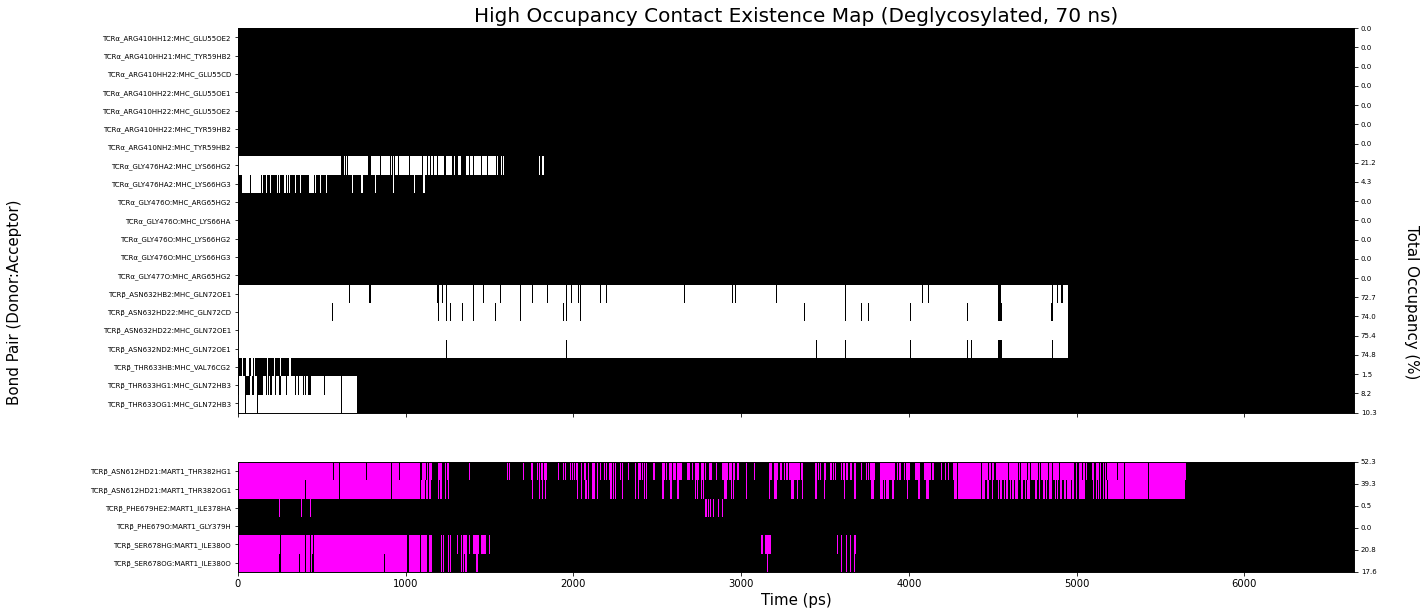

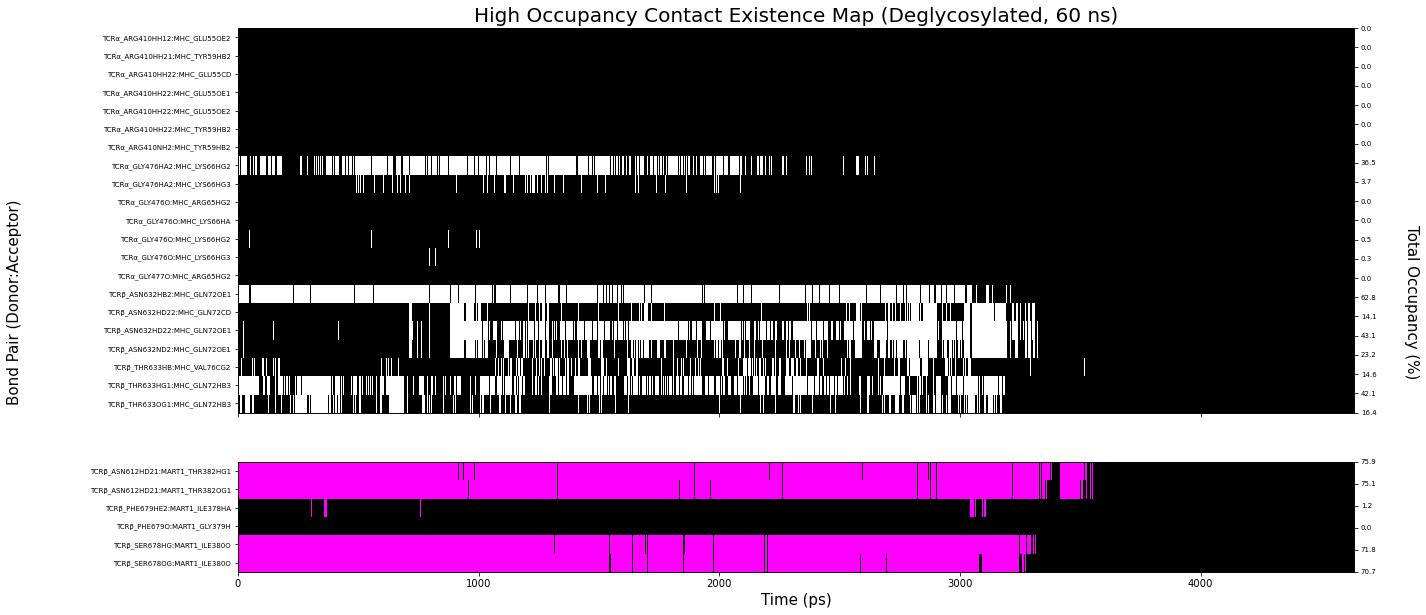

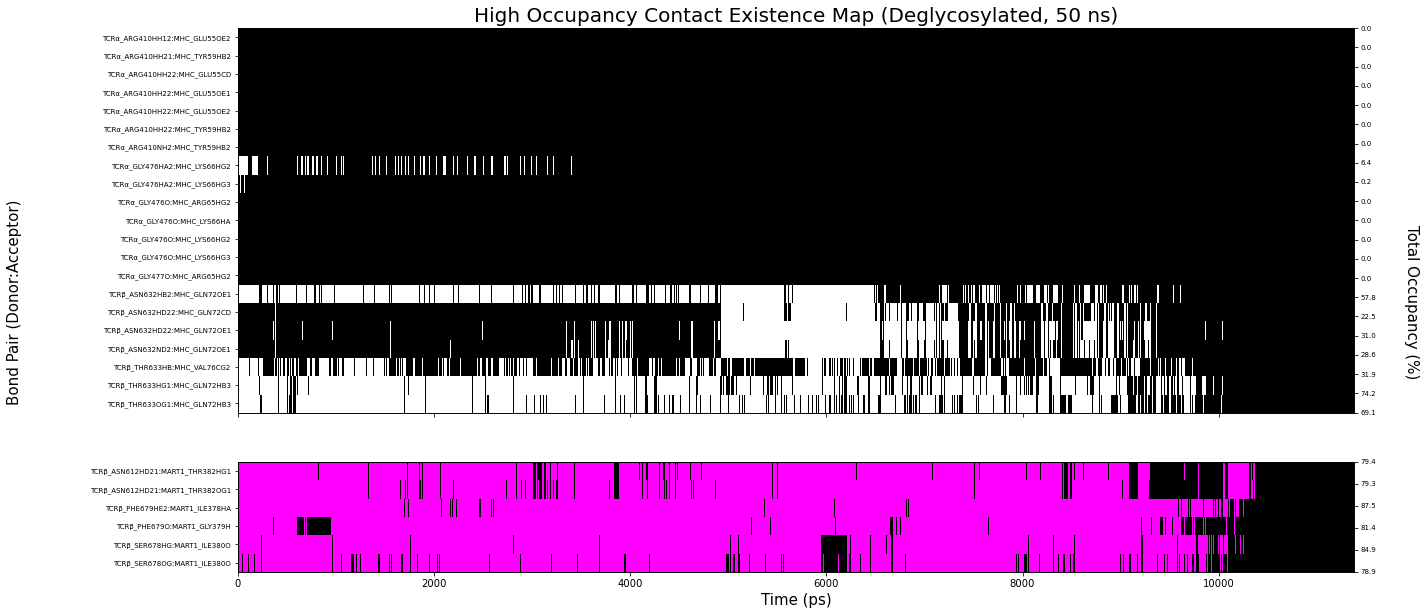

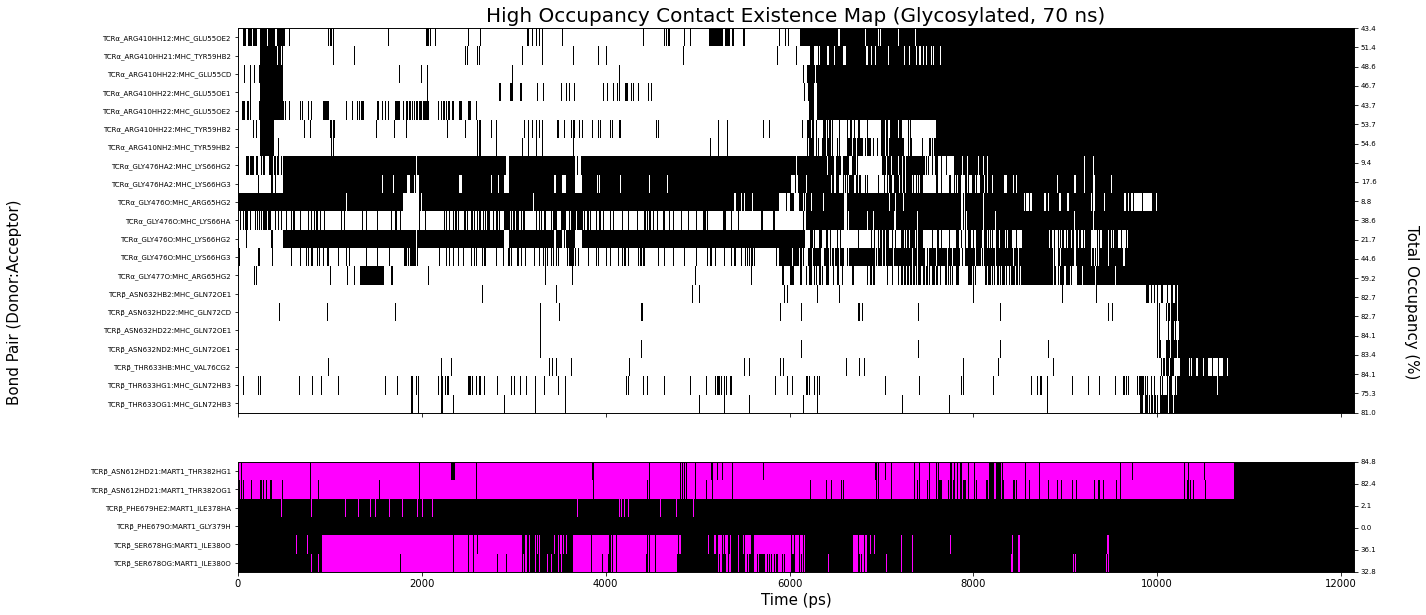

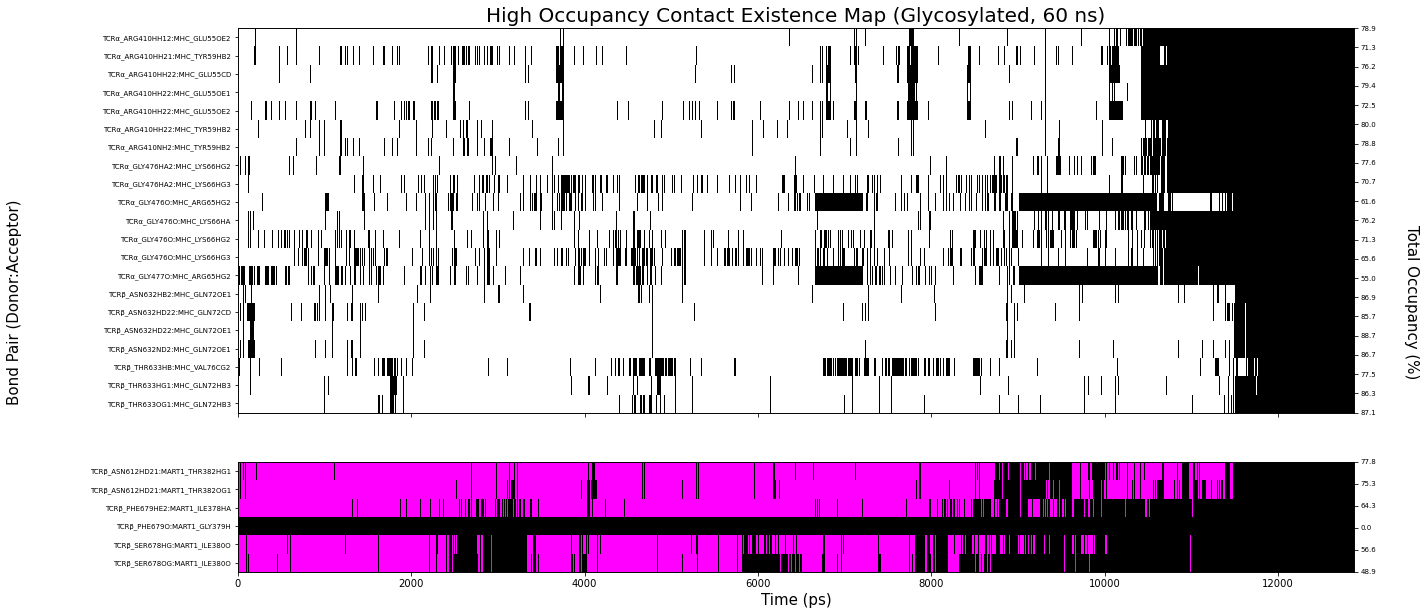

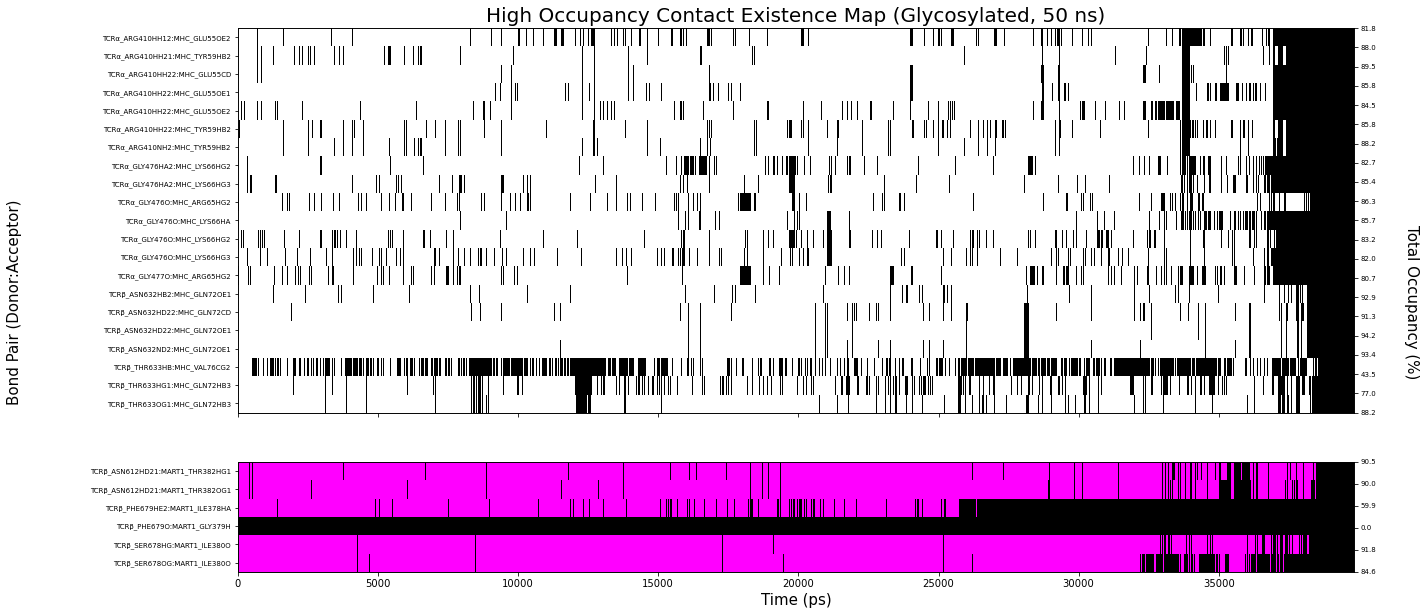

In [2]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#Let's map it up, homie!

M1_100 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/cmap.csv', index_col = 0, header=None)
M1_95 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/cmap.csv', index_col = 0, header=None)
M1_90 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/cmap.csv', index_col = 0, header=None)
                      
GVA_100 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/cmap.csv', index_col = 0, header=None)
GVA_95 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/cmap.csv', index_col = 0, header=None)         
GVA_90 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/cmap.csv', index_col = 0, header=None)
                       

#High Occupancy (>80%)
M1_100['Total Occupancy (%)'] = M1_100.mean(axis=1).round(decimals=3)
M1_100['Total Occupancy (%)'] = 100*M1_100['Total Occupancy (%)']
M1_100_5 = M1_100[M1_100['Total Occupancy (%)']> 80]

M1_95['Total Occupancy (%)'] = M1_95.mean(axis=1).round(decimals=3)
M1_95['Total Occupancy (%)'] = 100*M1_95['Total Occupancy (%)']
M1_95_5 = M1_95[M1_95['Total Occupancy (%)']> 80]

M1_90['Total Occupancy (%)'] = M1_90.mean(axis=1).round(decimals=3)
M1_90['Total Occupancy (%)'] = 100*M1_90['Total Occupancy (%)']
M1_90_5 = M1_90[M1_90['Total Occupancy (%)']>80]

GVA_100['Total Occupancy (%)'] = GVA_100.mean(axis=1).round(decimals=3)
GVA_100['Total Occupancy (%)'] = 100*GVA_100['Total Occupancy (%)']
GVA_100_5 = GVA_100[GVA_100['Total Occupancy (%)']> 80]

GVA_95['Total Occupancy (%)'] = GVA_95.mean(axis=1).round(decimals=3)
GVA_95['Total Occupancy (%)'] = 100*GVA_95['Total Occupancy (%)']
GVA_95_5 = GVA_95[GVA_95['Total Occupancy (%)']> 80]

GVA_90['Total Occupancy (%)'] = GVA_90.mean(axis=1).round(decimals=3)
GVA_90['Total Occupancy (%)'] = 100*GVA_90['Total Occupancy (%)']
GVA_90_5 = GVA_90[GVA_90['Total Occupancy (%)']>80]


#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_M95 = pd.Index(M1_95_5.index.tolist())
ndx_M90 = pd.Index(M1_90_5.index.tolist())

ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())
ndx_GVA95 = pd.Index(GVA_95_5.index.tolist())
ndx_GVA90 = pd.Index(GVA_90_5.index.tolist())



#Intra-Mutant Common Indices

###MART1###

#M1 Common Index
M1_100_95= ndx_M95.difference(ndx_M100, sort=False).tolist()
M1_100_90= ndx_M90.difference(ndx_M100, sort=False).tolist()
M1_100_diff = list(set(M1_100_95+M1_100_90))
M1_95_100 = ndx_M100.difference(ndx_M95, sort=False).tolist()
M1_95_90 = ndx_M90.difference(ndx_M95, sort=False).tolist()
M1_95_diff = list(set(M1_95_100+M1_95_90)) 
M1_90_100 = ndx_M100.difference(ndx_M90, sort=False).tolist()
M1_90_95 = ndx_M95.difference(ndx_M90, sort=False).tolist()
M1_90_diff = list(set(M1_90_100+M1_90_95))

##M1 Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(M1_100_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_100_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_100_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(M1_95_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_95_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_95_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(M1_90_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_90_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_90_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)

###GVA###

#GVA Common Index
GVA_100_95= ndx_GVA95.difference(ndx_GVA100, sort=False).tolist()
GVA_100_90= ndx_GVA90.difference(ndx_GVA100, sort=False).tolist()
GVA_100_diff = list(set(GVA_100_95+GVA_100_90))
GVA_95_100 = ndx_GVA100.difference(ndx_GVA95, sort=False).tolist()
GVA_95_90 = ndx_GVA90.difference(ndx_GVA95, sort=False).tolist()
GVA_95_diff = list(set(GVA_95_100+GVA_95_90)) 
GVA_90_100 = ndx_GVA100.difference(ndx_GVA90, sort=False).tolist()
GVA_90_95 = ndx_GVA95.difference(ndx_GVA90, sort=False).tolist()
GVA_90_diff = list(set(GVA_90_100+GVA_90_95))

##GVA Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(GVA_100_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_100_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_100_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(GVA_95_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_95_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_95_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(GVA_90_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_90_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_90_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)


#Inter-Mutant Common Indices

#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())

#Total Common Index
M1_GVA= ndx_GVA100.difference(ndx_M100, sort=False).tolist()
M1_diff= list(set( M1_GVA))

GVA_M1= ndx_M100.difference(ndx_GVA100, sort=False).tolist()
GVA_diff= list(set(GVA_M1 ))


###MART1 Inter-Mutant Common Index Addition Loops###
                
#MART1 100 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#MART1 95 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#MART1 90 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)
               
###GVA Inter-Mutant Common Index Addition Loops###
                
#GVA 100 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#GVA 95 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#GVA 90 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)

                

                
###PLOTTING###
                
FS=7                
###MART1###
#Plot MART1 100 ns
MHC_100 = M1_100_5[M1_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape

pep_100 = M1_100_5[M1_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (Deglycosylated, 70 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','magenta'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot MART1 95 ns
MHC_95 = M1_95_5[M1_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = M1_95_5[M1_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (Deglycosylated, 60 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot MART1 90 ns
MHC_90 = M1_90_5[M1_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = M1_90_5[M1_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (Deglycosylated, 50 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/contact_occupancy.png', bbox_inches='tight', dpi=300)
                
                
###GVA###
                
#Plot GVA 100 ns

MHC_100 = GVA_100_5[GVA_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_rows, MHC_cols = MHC_100.shape
print(MHC_100.shape)
                
pep_100 = GVA_100_5[GVA_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_rows, pep_cols = pep_100.shape
print(pep_100.shape)
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_100,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_100.index)))
ax[0].set_yticklabels(MHC_100.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (Glycosylated, 70 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_100_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

cmap = colors.ListedColormap(['black','magenta'])
boundaries = [0,1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

ax[1].imshow(pep_100,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_100.index)))
ax[1].set_yticklabels(pep_100.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_100_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_100_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot GVA 95 ns
MHC_95 = GVA_95_5[GVA_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)

pep_95 = GVA_95_5[GVA_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_95,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_95.index)))
ax[0].set_yticklabels(MHC_95.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (Glycosylated, 60 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_95_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_95,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_95.index)))
ax[1].set_yticklabels(pep_95.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_95_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_95_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/contact_occupancy.png', bbox_inches='tight', dpi=300)

#Plot GVA 90 ns
MHC_90 = GVA_90_5[GVA_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)

pep_90 = GVA_90_5[GVA_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)

print(GVA_100_5.shape)
print(GVA_95_5.shape)
print(GVA_90_5.shape)
print(MHC_90.shape)
print(pep_90.shape)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
ax[0].imshow(MHC_90,aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_90.index)))
ax[0].set_yticklabels(MHC_90.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Existence Map (Glycosylated, 50 ns)',fontsize=20)
ax2 = ax[0].twinx()
ax2.set_yticks(range(len(MHC_90_ocpy['Total Occupancy (%)'])))
ax2.set_yticklabels(MHC_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)


ax[1].imshow(pep_90,aspect='auto', cmap=cmap, interpolation='nearest')
ax[1].set_yticks(range(len(pep_90.index)))
ax[1].set_yticklabels(pep_90.index, fontsize=FS)
ax[1].set_xlabel('Time (ps)', fontsize=15)
ax3 = ax[1].twinx()
ax3.set_yticks(range(len(pep_90_ocpy['Total Occupancy (%)'])))
ax3.set_yticklabels(pep_90_ocpy['Total Occupancy (%)'].round(decimals=1).iloc[::-1], fontsize=FS)

fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.94,0.5, 'Total Occupancy (%)', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/contact_occupancy.png', bbox_inches='tight', dpi=300)
                




6632
4619
11368
12139
12872
39815


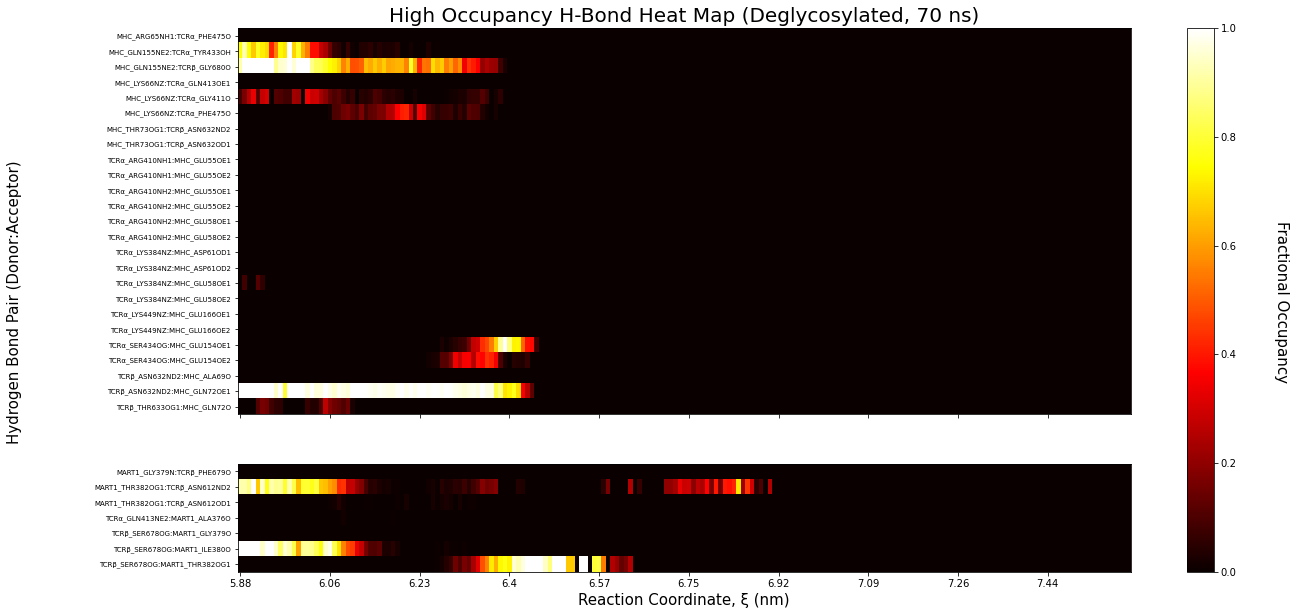

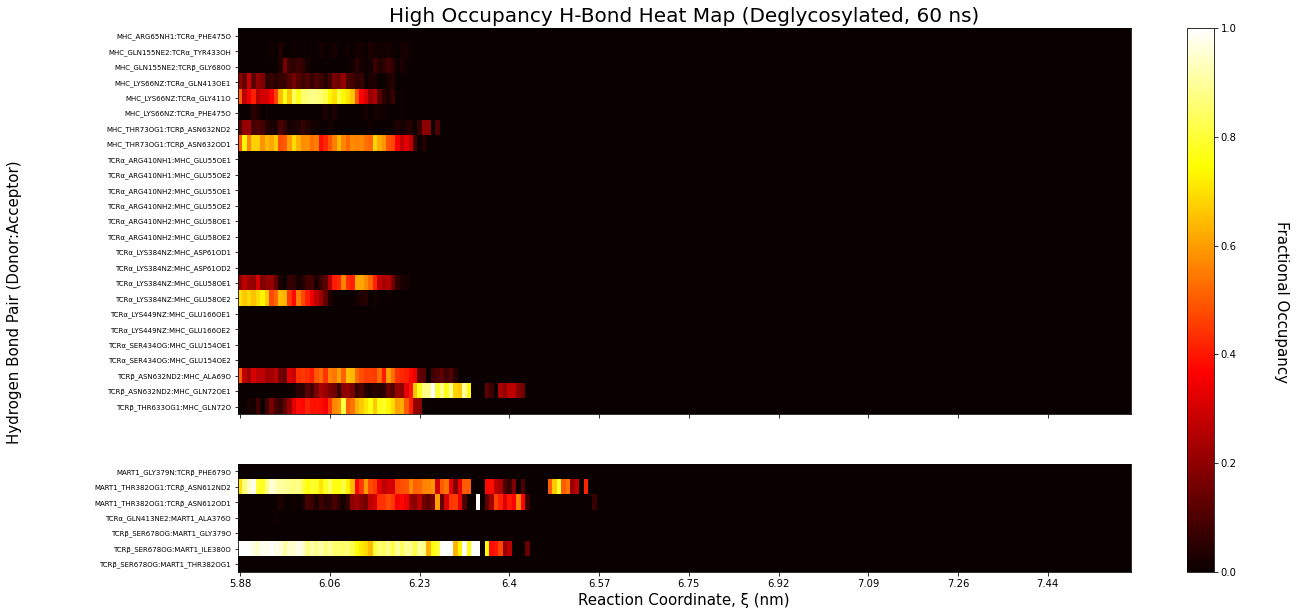

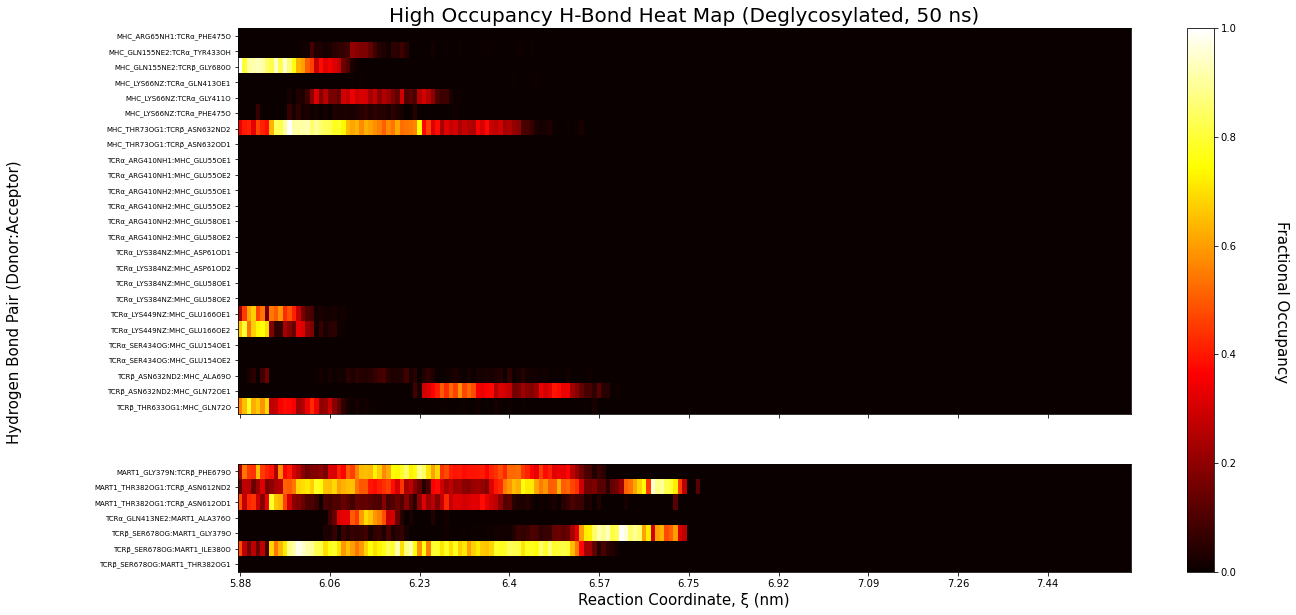

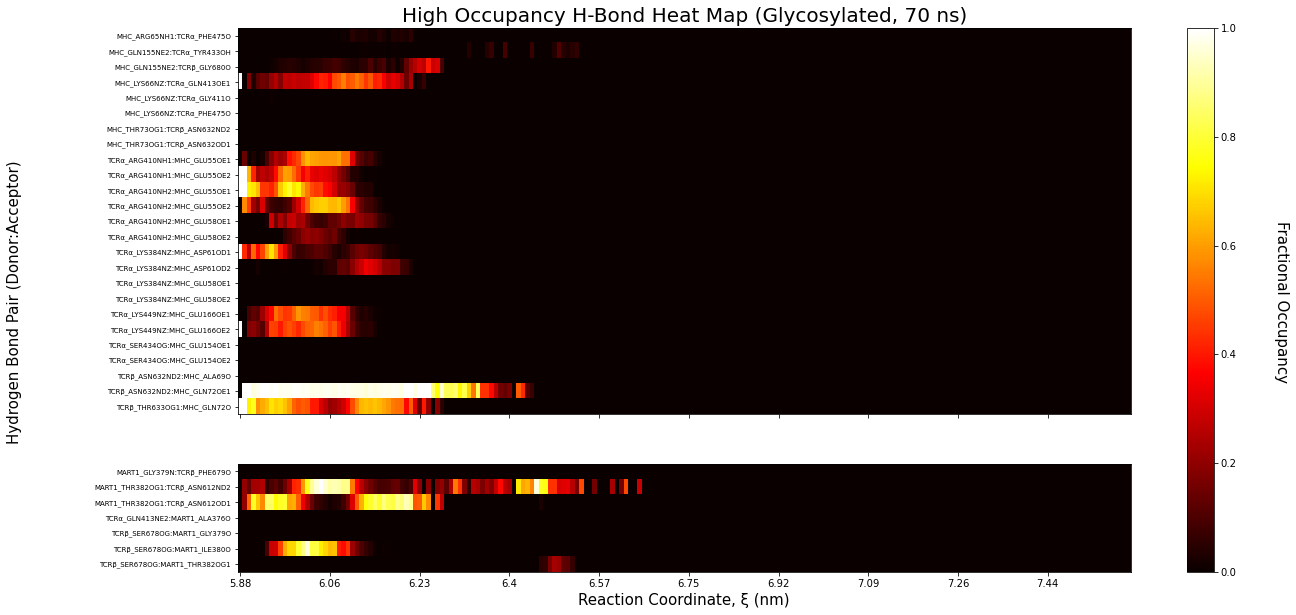

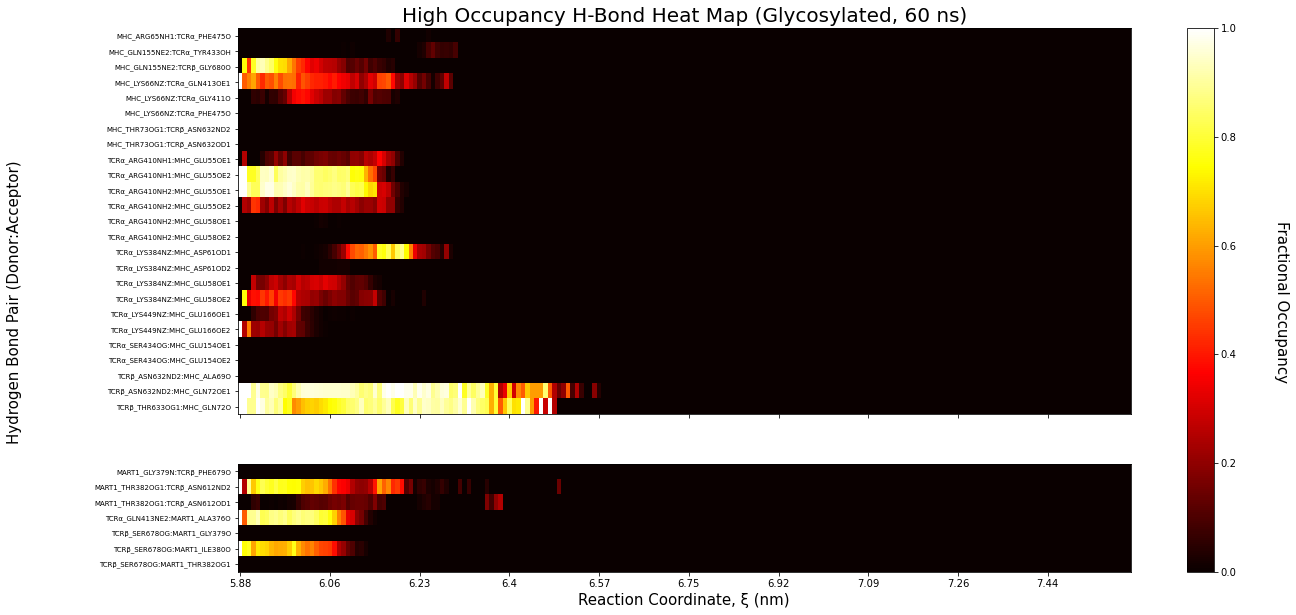

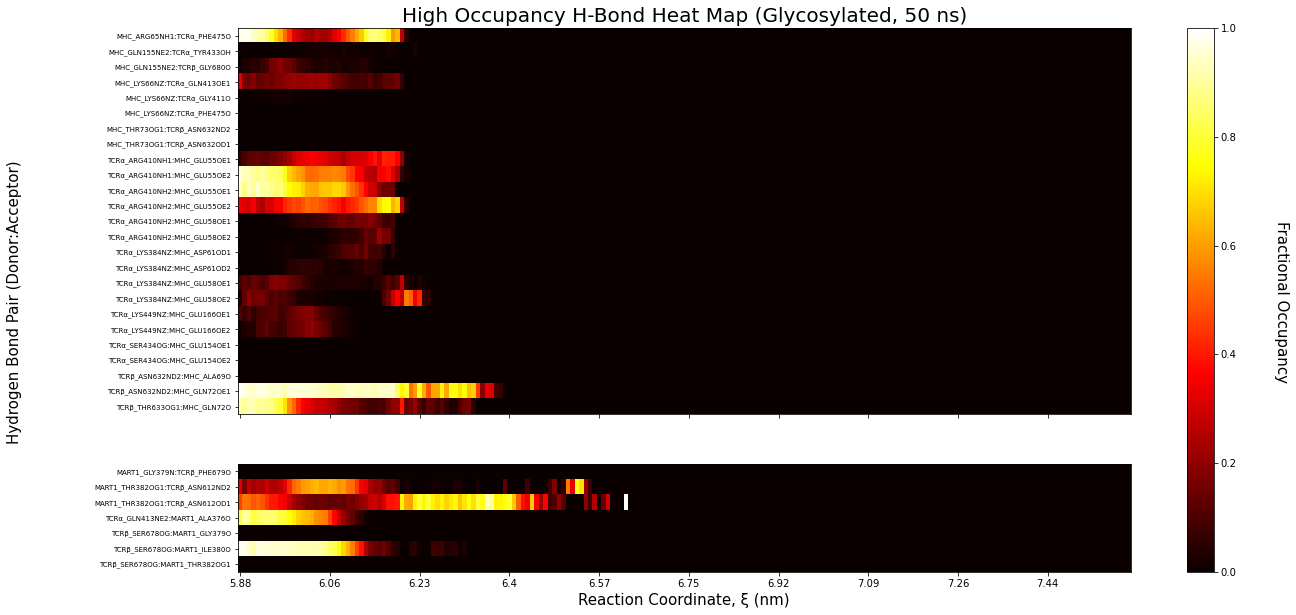

In [4]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#Let's map it up, homie!

#Let's map it up, homie!

M1_100 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/hmap.csv', index_col = 0, header=None)
M1_95 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/hmap.csv', index_col = 0, header=None)
M1_90 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/hmap.csv', index_col = 0, header=None)
                      
GVA_100 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/hmap.csv', index_col = 0, header=None)
GVA_95 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/hmap.csv', index_col = 0, header=None)         
GVA_90 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/hmap.csv', index_col = 0, header=None)
                       


###Time vs Distance Data###
#MART1
x_M1_100, x_M1_95, x_M1_90 = [],[],[]
t_M1_100, t_M1_95, t_M1_90 = [],[],[]

with open("/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_M1_100.append(float(cols[0]))
            x_M1_100.append(float(cols[1]))
            
with open("/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_M1_95.append(float(cols[0]))
            x_M1_95.append(float(cols[1]))
with open("/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_M1_90.append(float(cols[0]))
            x_M1_90.append(float(cols[1]))


x_M1_100 = x_M1_100[::10]            
x_M1_95 = x_M1_95[::10]
x_M1_90 = x_M1_90[::10]

print(len(x_M1_100))
print(len(x_M1_95))
print(len(x_M1_90))
rows_100, cols_100 = M1_100.shape
rows_95, cols_95 = M1_95.shape
rows_90, cols_90 = M1_90.shape

cut_M1_100 = list(range(len(x_M1_100),cols_100))
cut_M1_95 = list(range(len(x_M1_95),cols_95))
cut_M1_90 = list(range(len(x_M1_90),cols_90))

M1_100 = M1_100.drop(cut_M1_100 ,axis=1)
M1_95 = M1_95.drop(cut_M1_95 ,axis=1)
M1_90 = M1_90.drop(cut_M1_90 ,axis=1)

#GVA
x_GVA_100, x_GVA_95, x_GVA_90 = [],[],[]
t_GVA_100, t_GVA_95, t_GVA_90 = [],[],[]

with open("/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_GVA_100.append(float(cols[0]))
            x_GVA_100.append(float(cols[1]))
            
with open("/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_GVA_95.append(float(cols[0]))
            x_GVA_95.append(float(cols[1]))
with open("/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_GVA_90.append(float(cols[0]))
            x_GVA_90.append(float(cols[1]))


          
x_GVA_95 = x_GVA_95[::10]
x_GVA_90 = x_GVA_90[::10]

print(len(x_GVA_100))
print(len(x_GVA_95))
print(len(x_GVA_90))

rows_100, cols_100 = GVA_100.shape
rows_95, cols_95 = GVA_95.shape
rows_90, cols_90 = GVA_90.shape

cut_GVA_100 = list(range(len(x_GVA_100),cols_100))
cut_GVA_95 = list(range(len(x_GVA_95),cols_95))
cut_GVA_90 = list(range(len(x_GVA_90),cols_90))

GVA_100 = GVA_100.drop(cut_GVA_100 ,axis=1)
GVA_95 = GVA_95.drop(cut_GVA_95 ,axis=1)
GVA_90 = GVA_90.drop(cut_GVA_90 ,axis=1)



#High Occupancy (>5%)
M1_100['Total Occupancy (%)'] = M1_100.mean(axis=1).round(decimals=3)
M1_100['Total Occupancy (%)'] = 100*M1_100['Total Occupancy (%)']
M1_100_5 = M1_100[M1_100['Total Occupancy (%)']> 5]

M1_95['Total Occupancy (%)'] = M1_95.mean(axis=1).round(decimals=3)
M1_95['Total Occupancy (%)'] = 100*M1_95['Total Occupancy (%)']
M1_95_5 = M1_95[M1_95['Total Occupancy (%)']> 5]

M1_90['Total Occupancy (%)'] = M1_90.mean(axis=1).round(decimals=3)
M1_90['Total Occupancy (%)'] = 100*M1_90['Total Occupancy (%)']
M1_90_5 = M1_90[M1_90['Total Occupancy (%)']>5]

GVA_100['Total Occupancy (%)'] = GVA_100.mean(axis=1).round(decimals=3)
GVA_100['Total Occupancy (%)'] = 100*GVA_100['Total Occupancy (%)']
GVA_100_5 = GVA_100[GVA_100['Total Occupancy (%)']> 5]

GVA_95['Total Occupancy (%)'] = GVA_95.mean(axis=1).round(decimals=3)
GVA_95['Total Occupancy (%)'] = 100*GVA_95['Total Occupancy (%)']
GVA_95_5 = GVA_95[GVA_95['Total Occupancy (%)']> 5]

GVA_90['Total Occupancy (%)'] = GVA_90.mean(axis=1).round(decimals=3)
GVA_90['Total Occupancy (%)'] = 100*GVA_90['Total Occupancy (%)']
GVA_90_5 = GVA_90[GVA_90['Total Occupancy (%)']>5]



#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_M95 = pd.Index(M1_95_5.index.tolist())
ndx_M90 = pd.Index(M1_90_5.index.tolist())

ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())
ndx_GVA95 = pd.Index(GVA_95_5.index.tolist())
ndx_GVA90 = pd.Index(GVA_90_5.index.tolist())

#Intra-Mutant Common Indices

###MART1###

#M1 Common Index
M1_100_95= ndx_M95.difference(ndx_M100, sort=False).tolist()
M1_100_90= ndx_M90.difference(ndx_M100, sort=False).tolist()
M1_100_diff = list(set(M1_100_95+M1_100_90))
M1_95_100 = ndx_M100.difference(ndx_M95, sort=False).tolist()
M1_95_90 = ndx_M90.difference(ndx_M95, sort=False).tolist()
M1_95_diff = list(set(M1_95_100+M1_95_90)) 
M1_90_100 = ndx_M100.difference(ndx_M90, sort=False).tolist()
M1_90_95 = ndx_M95.difference(ndx_M90, sort=False).tolist()
M1_90_diff = list(set(M1_90_100+M1_90_95))

##M1 Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(M1_100_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_100_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_100_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(M1_95_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_95_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_95_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(M1_90_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_90_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_90_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)

###GVA###

#GVA Common Index
GVA_100_95= ndx_GVA95.difference(ndx_GVA100, sort=False).tolist()
GVA_100_90= ndx_GVA90.difference(ndx_GVA100, sort=False).tolist()
GVA_100_diff = list(set(GVA_100_95+GVA_100_90))
GVA_95_100 = ndx_GVA100.difference(ndx_GVA95, sort=False).tolist()
GVA_95_90 = ndx_GVA90.difference(ndx_GVA95, sort=False).tolist()
GVA_95_diff = list(set(GVA_95_100+GVA_95_90)) 
GVA_90_100 = ndx_GVA100.difference(ndx_GVA90, sort=False).tolist()
GVA_90_95 = ndx_GVA95.difference(ndx_GVA90, sort=False).tolist()
GVA_90_diff = list(set(GVA_90_100+GVA_90_95))

##GVA Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(GVA_100_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_100_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_100_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(GVA_95_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_95_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_95_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(GVA_90_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_90_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_90_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)

#Inter-Mutant Common Indices

#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())

#Total Common Index

M1_GVA= ndx_GVA100.difference(ndx_M100, sort=False).tolist()
M1_diff= list(set(M1_GVA))

GVA_M1= ndx_M100.difference(ndx_GVA100, sort=False).tolist()
GVA_diff= list(set(GVA_M1))



###MART1 Inter-Mutant Common Index Addition Loops###
                
#MART1 100 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#MART1 95 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#MART1 90 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)
               
###GVA Inter-Mutant Common Index Addition Loops###
                
#GVA 100 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#GVA 95 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#GVA 90 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)

                
                
                
###PLOTTING###
                
FS=7
bins=np.linspace(5.884,7.600,200).tolist()
xticks=bins[::20]
xticks=np.around(xticks,2)

###MART1###
#Plot MART1 100 ns
MHC_100 = M1_100_5[M1_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_100 = MHC_100.iloc[:,:-1]
MHC_rows, MHC_cols = MHC_100.shape
MHC_100.columns = x_M1_100
MHC_100 = MHC_100.sort_index(axis=1, ascending=True)
MHC_M1_100x = pd.DataFrame()
MHC_M1_100x = MHC_M1_100x.append(MHC_100.groupby(pd.cut(MHC_100.columns.tolist(), bins=bins),axis=1).mean())
MHC_M1_100x = MHC_M1_100x.fillna(0)

pep_100 = M1_100_5[M1_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_100 = pep_100.iloc[:,:-1]
pep_rows, pep_cols = pep_100.shape
pep_100.columns = x_M1_100
pep_100 = pep_100.sort_index(axis=1, ascending=True)
pep_M1_100x = pd.DataFrame()
pep_M1_100x = pep_M1_100x.append(pep_100.groupby(pd.cut(pep_100.columns.tolist(), bins=bins),axis=1).mean())
pep_M1_100x = pep_M1_100x.fillna(0)
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_M1_100x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_M1_100x.index)))
ax[0].set_yticklabels(MHC_M1_100x.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Heat Map (Deglycosylated, 70 ns)',fontsize=20)

ax[1].imshow(pep_M1_100x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_M1_100x.index)))
ax[1].set_yticklabels(pep_M1_100x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_M1_100x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)

fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/HBoccupancy_x.png', bbox_inches='tight', dpi=300)

#Plot MART1 95 ns
MHC_95 = M1_95_5[M1_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)
MHC_95 = MHC_95.iloc[:,:-1]
MHC_95.columns = x_M1_95
MHC_95 = MHC_95.sort_index(axis=1, ascending=True)
MHC_M1_95x = pd.DataFrame()
MHC_M1_95x = MHC_M1_95x.append(MHC_95.groupby(pd.cut(MHC_95.columns.tolist(), bins=bins),axis=1).mean())
MHC_M1_95x = MHC_M1_95x.fillna(0)

pep_95 = M1_95_5[M1_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)
pep_95 = pep_95.iloc[:,:-1]
pep_95.columns = x_M1_95
pep_95 = pep_95.sort_index(axis=1, ascending=True)
pep_M1_95x = pd.DataFrame()
pep_M1_95x = pep_M1_95x.append(pep_95.groupby(pd.cut(pep_95.columns.tolist(), bins=bins),axis=1).mean())
pep_M1_95x = pep_M1_95x.fillna(0)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_M1_95x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_M1_95x.index)))
ax[0].set_yticklabels(MHC_M1_95x.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Heat Map (Deglycosylated, 60 ns)',fontsize=20)


ax[1].imshow(pep_M1_95x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_M1_95x.index)))
ax[1].set_yticklabels(pep_M1_95x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_M1_95x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/HBoccupancy_x.png', bbox_inches='tight', dpi=300)

#Plot MART1 90 ns
MHC_90 = M1_90_5[M1_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)
MHC_90 = MHC_90.iloc[:,:-1]
MHC_90.columns = x_M1_90
MHC_90 = MHC_90.sort_index(axis=1, ascending=True)
MHC_M1_90x = pd.DataFrame()
MHC_M1_90x = MHC_M1_90x.append(MHC_90.groupby(pd.cut(MHC_90.columns.tolist(), bins=bins),axis=1).mean())
MHC_M1_90x = MHC_M1_90x.fillna(0)

pep_90 = M1_90_5[M1_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)
pep_90 = pep_90.iloc[:,:-1]
pep_90.columns = x_M1_90
pep_90 = pep_90.sort_index(axis=1, ascending=True)
pep_M1_90x = pd.DataFrame()
pep_M1_90x = pep_M1_90x.append(pep_90.groupby(pd.cut(pep_90.columns.tolist(), bins=bins),axis=1).mean())
pep_M1_90x = pep_M1_90x.fillna(0)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_M1_90x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_M1_90x.index)))
ax[0].set_yticklabels(MHC_M1_90x.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Heat Map (Deglycosylated, 50 ns)',fontsize=20)



ax[1].imshow(pep_M1_90x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_M1_90x.index)))
ax[1].set_yticklabels(pep_M1_90x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_M1_90x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/HBoccupancy_x.png', bbox_inches='tight', dpi=300)
                
                
###GVA###
                
#Plot GVA 100 ns

MHC_100 = GVA_100_5[GVA_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_100 = MHC_100.iloc[:,:-1]
MHC_rows, MHC_cols = MHC_100.shape
MHC_100.columns = x_GVA_100
MHC_100 = MHC_100.sort_index(axis=1, ascending=True)
MHC_GVA_100x = pd.DataFrame()
MHC_GVA_100x = MHC_GVA_100x.append(MHC_100.groupby(pd.cut(MHC_100.columns.tolist(), bins=bins),axis=1).mean())
MHC_GVA_100x = MHC_GVA_100x.fillna(0)

                
pep_100 = GVA_100_5[GVA_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_100 = pep_100.iloc[:,:-1]
pep_rows, pep_cols = pep_100.shape
pep_100.columns = x_GVA_100
pep_100 = pep_100.sort_index(axis=1, ascending=True)
pep_GVA_100x = pd.DataFrame()
pep_GVA_100x = pep_GVA_100x.append(pep_100.groupby(pd.cut(pep_100.columns.tolist(), bins=bins),axis=1).mean())
pep_GVA_100x = pep_GVA_100x.fillna(0)
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_GVA_100x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_GVA_100x.index)))
ax[0].set_yticklabels(MHC_GVA_100x.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Heat Map (Glycosylated, 70 ns)',fontsize=20)


ax[1].imshow(pep_GVA_100x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_GVA_100x.index)))
ax[1].set_yticklabels(pep_GVA_100x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_GVA_100x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/HBoccupancy_x.png', bbox_inches='tight', dpi=300)

#Plot GVA 95 ns
MHC_95 = GVA_95_5[GVA_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)
MHC_95 = MHC_95.iloc[:,:-1]
MHC_95.columns = x_GVA_95
MHC_95 = MHC_95.sort_index(axis=1, ascending=True)
MHC_GVA_95x = pd.DataFrame()
MHC_GVA_95x = MHC_GVA_95x.append(MHC_95.groupby(pd.cut(MHC_95.columns.tolist(), bins=bins),axis=1).mean())
MHC_GVA_95x = MHC_GVA_95x.fillna(0)

pep_95 = GVA_95_5[GVA_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)
pep_95 = pep_95.iloc[:,:-1]
pep_95.columns = x_GVA_95
pep_95 = pep_95.sort_index(axis=1, ascending=True)
pep_GVA_95x = pd.DataFrame()
pep_GVA_95x = pep_GVA_95x.append(pep_95.groupby(pd.cut(pep_95.columns.tolist(), bins=bins),axis=1).mean())
pep_GVA_95x = pep_GVA_95x.fillna(0)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_GVA_95x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_GVA_95x.index)))
ax[0].set_yticklabels(MHC_GVA_95x.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Heat Map (Glycosylated, 60 ns)',fontsize=20)


ax[1].imshow(pep_GVA_95x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_GVA_95x.index)))
ax[1].set_yticklabels(pep_GVA_95x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_GVA_95x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/HBoccupancy_x.png', bbox_inches='tight', dpi=300)

#Plot GVA 90 ns
MHC_90 = GVA_90_5[GVA_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)
MHC_90 = MHC_90.iloc[:,:-1]
MHC_90.columns = x_GVA_90
MHC_90 = MHC_90.sort_index(axis=1, ascending=True)
MHC_GVA_90x = pd.DataFrame()
MHC_GVA_90x = MHC_GVA_90x.append(MHC_90.groupby(pd.cut(MHC_90.columns.tolist(), bins=bins),axis=1).mean())
MHC_GVA_90x = MHC_GVA_90x.fillna(0)

pep_90 = GVA_90_5[GVA_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)
pep_90 = pep_90.iloc[:,:-1]
pep_90.columns = x_GVA_90
pep_90 = pep_90.sort_index(axis=1, ascending=True)
pep_GVA_90x = pd.DataFrame()
pep_GVA_90x = pep_GVA_90x.append(pep_90.groupby(pd.cut(pep_90.columns.tolist(), bins=bins),axis=1).mean())
pep_GVA_90x = pep_GVA_90x.fillna(0)


fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_GVA_90x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_GVA_90x.index)))
ax[0].set_yticklabels(MHC_GVA_90x.index, fontsize=FS)
ax[0].set_title('High Occupancy H-Bond Heat Map (Glycosylated, 50 ns)',fontsize=20)



ax[1].imshow(pep_GVA_90x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_GVA_90x.index)))
ax[1].set_yticklabels(pep_GVA_90x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_GVA_90x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Hydrogen Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/HBoccupancy_x.png', bbox_inches='tight', dpi=300)
                




6632
4619
11368
12139
12872
39815


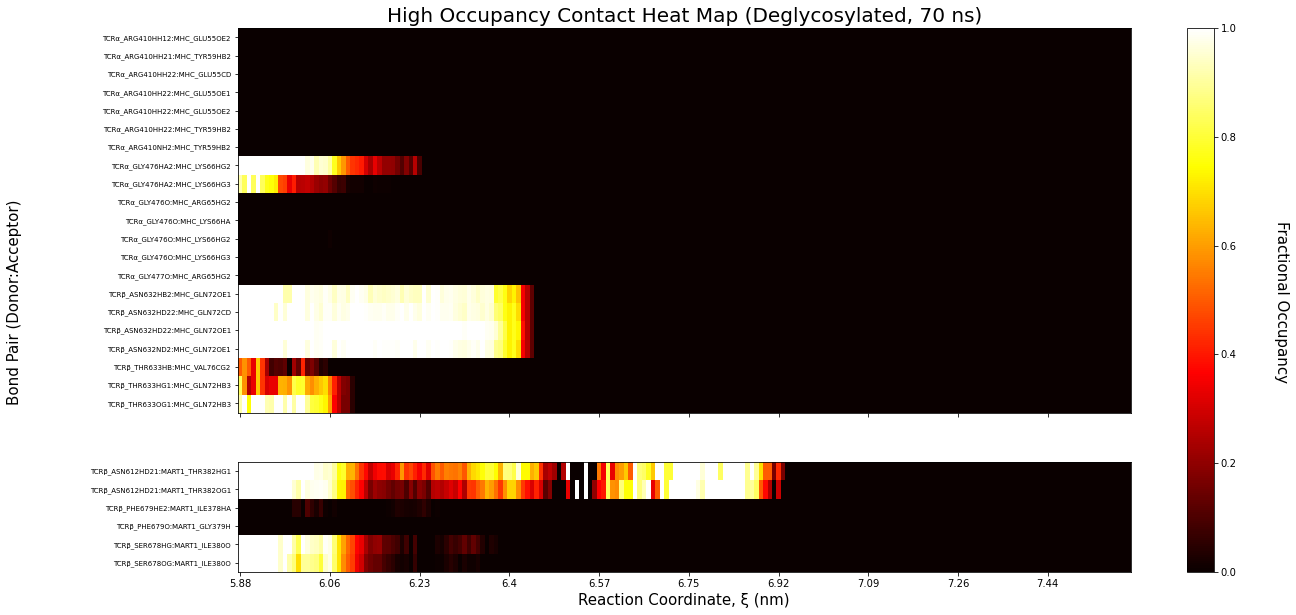

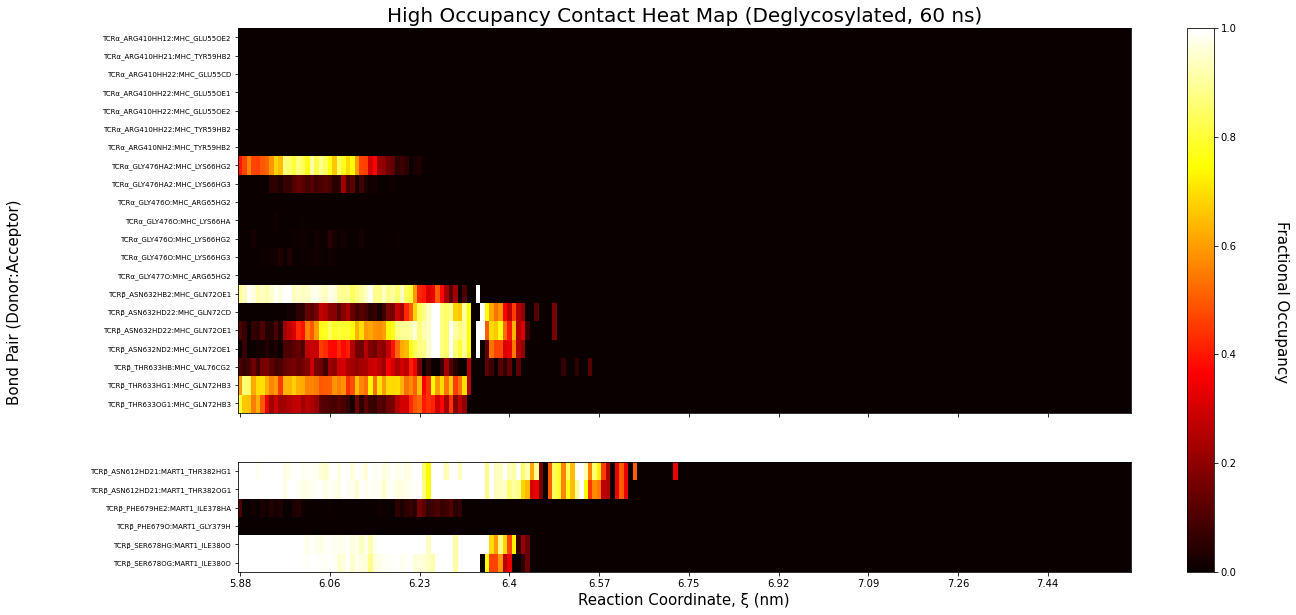

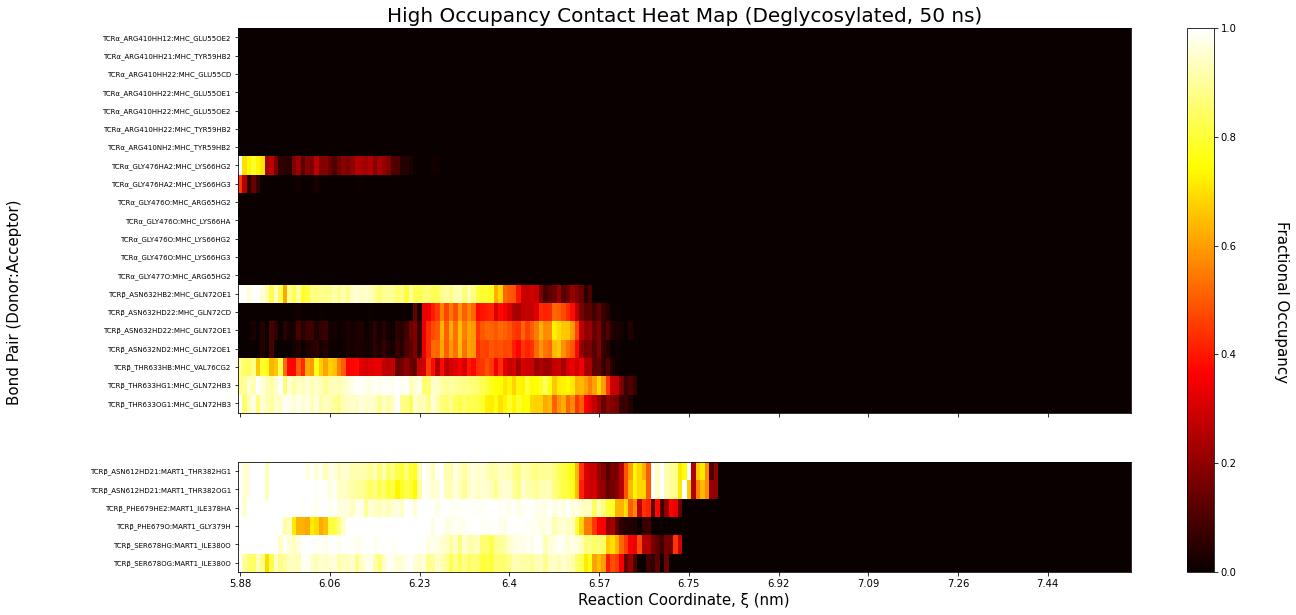

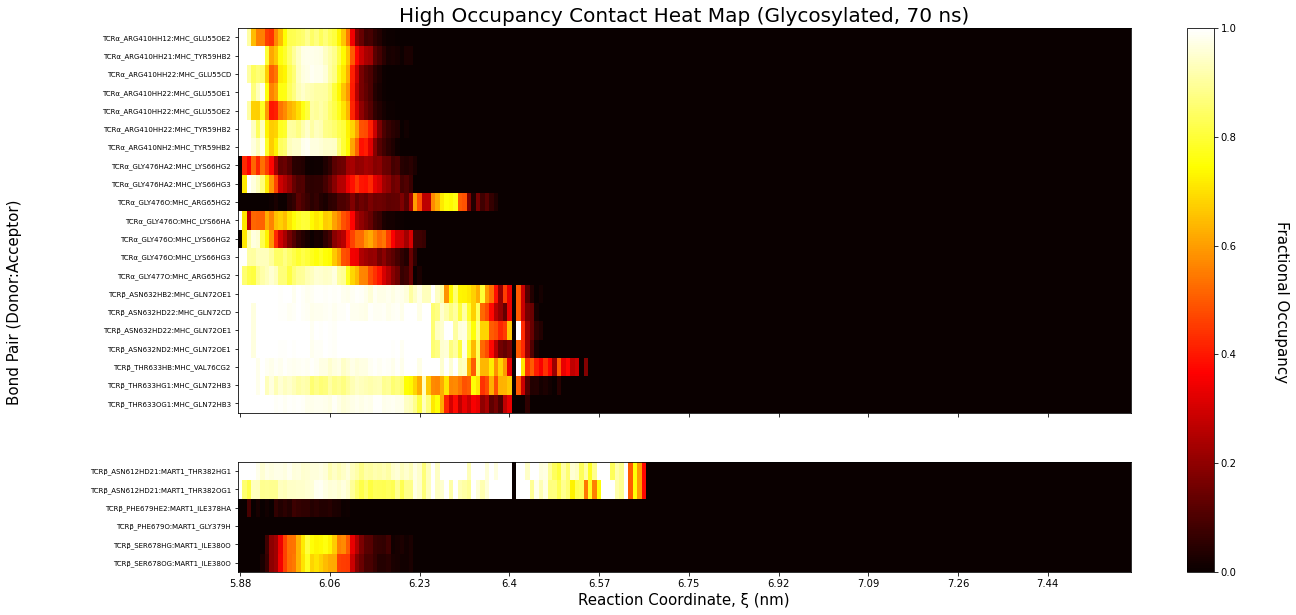

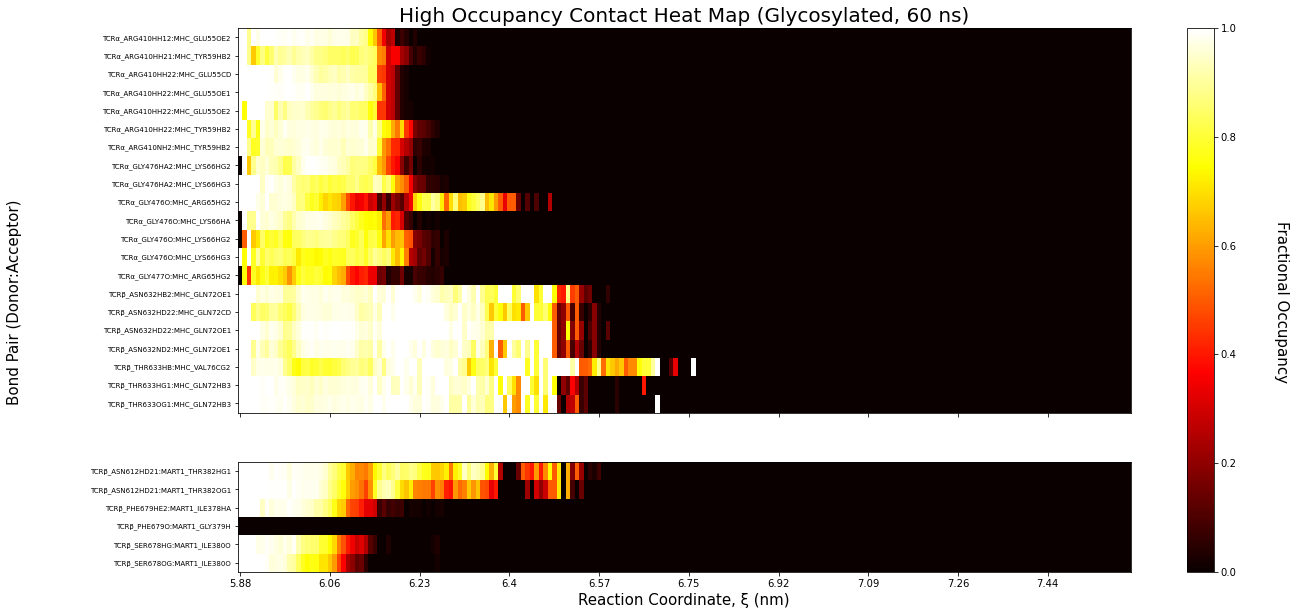

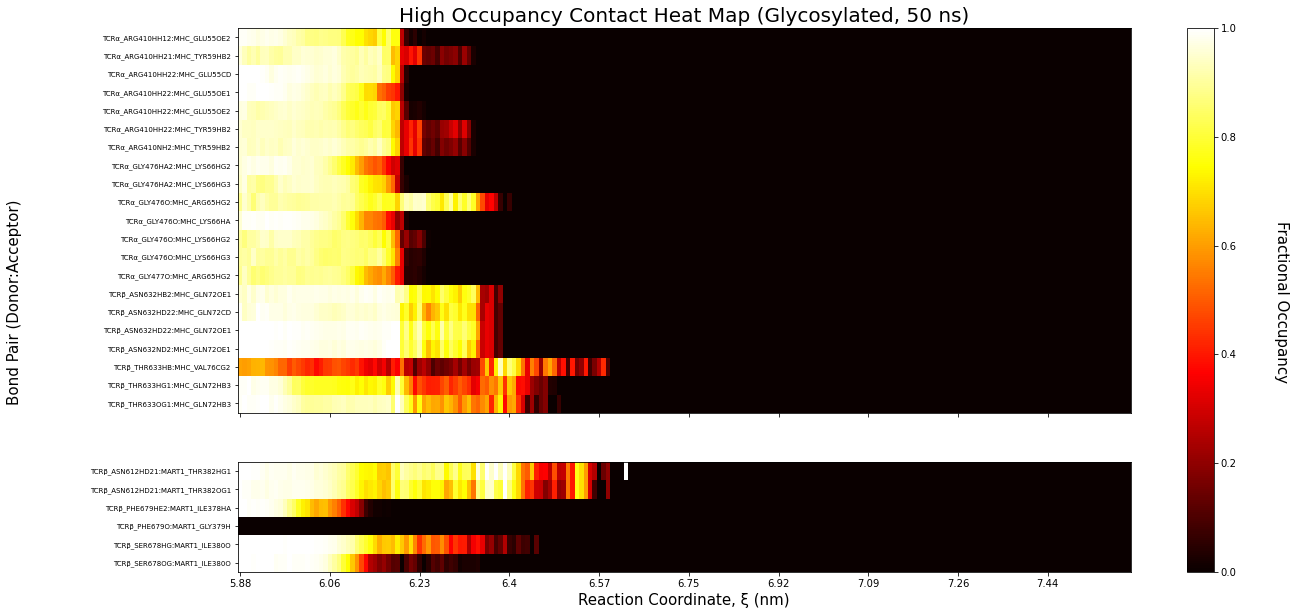

In [5]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#Let's map it up, homie!

#Let's map it up, homie!

M1_100 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/cmap.csv', index_col = 0, header=None)
M1_95 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/cmap.csv', index_col = 0, header=None)
M1_90 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/cmap.csv', index_col = 0, header=None)
                      
GVA_100 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/cmap.csv', index_col = 0, header=None)
GVA_95 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/cmap.csv', index_col = 0, header=None)         
GVA_90 = pd.read_csv(r'/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/cmap.csv', index_col = 0, header=None)
                       


###Time vs Distance Data###
#MART1
x_M1_100, x_M1_95, x_M1_90 = [],[],[]
t_M1_100, t_M1_95, t_M1_90 = [],[],[]

with open("/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_M1_100.append(float(cols[0]))
            x_M1_100.append(float(cols[1]))
            
with open("/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_M1_95.append(float(cols[0]))
            x_M1_95.append(float(cols[1]))
with open("/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_M1_90.append(float(cols[0]))
            x_M1_90.append(float(cols[1]))


x_M1_100 = x_M1_100[::10]            
x_M1_95 = x_M1_95[::10]
x_M1_90 = x_M1_90[::10]

print(len(x_M1_100))
print(len(x_M1_95))
print(len(x_M1_90))
rows_100, cols_100 = M1_100.shape
rows_95, cols_95 = M1_95.shape
rows_90, cols_90 = M1_90.shape

cut_M1_100 = list(range(len(x_M1_100),cols_100))
cut_M1_95 = list(range(len(x_M1_95),cols_95))
cut_M1_90 = list(range(len(x_M1_90),cols_90))

M1_100 = M1_100.drop(cut_M1_100 ,axis=1)
M1_95 = M1_95.drop(cut_M1_95 ,axis=1)
M1_90 = M1_90.drop(cut_M1_90 ,axis=1)

#GVA
x_GVA_100, x_GVA_95, x_GVA_90 = [],[],[]
t_GVA_100, t_GVA_95, t_GVA_90 = [],[],[]

with open("/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_GVA_100.append(float(cols[0]))
            x_GVA_100.append(float(cols[1]))
            
with open("/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_GVA_95.append(float(cols[0]))
            x_GVA_95.append(float(cols[1]))
with open("/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/pullxcf.xvg") as f:
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 2:
            t_GVA_90.append(float(cols[0]))
            x_GVA_90.append(float(cols[1]))


          
x_GVA_95 = x_GVA_95[::10]
x_GVA_90 = x_GVA_90[::10]

print(len(x_GVA_100))
print(len(x_GVA_95))
print(len(x_GVA_90))

rows_100, cols_100 = GVA_100.shape
rows_95, cols_95 = GVA_95.shape
rows_90, cols_90 = GVA_90.shape

cut_GVA_100 = list(range(len(x_GVA_100),cols_100))
cut_GVA_95 = list(range(len(x_GVA_95),cols_95))
cut_GVA_90 = list(range(len(x_GVA_90),cols_90))

GVA_100 = GVA_100.drop(cut_GVA_100 ,axis=1)
GVA_95 = GVA_95.drop(cut_GVA_95 ,axis=1)
GVA_90 = GVA_90.drop(cut_GVA_90 ,axis=1)



#High Occupancy (>5%)
M1_100['Total Occupancy (%)'] = M1_100.mean(axis=1).round(decimals=3)
M1_100['Total Occupancy (%)'] = 100*M1_100['Total Occupancy (%)']
M1_100_5 = M1_100[M1_100['Total Occupancy (%)']> 80]

M1_95['Total Occupancy (%)'] = M1_95.mean(axis=1).round(decimals=3)
M1_95['Total Occupancy (%)'] = 100*M1_95['Total Occupancy (%)']
M1_95_5 = M1_95[M1_95['Total Occupancy (%)']> 80]

M1_90['Total Occupancy (%)'] = M1_90.mean(axis=1).round(decimals=3)
M1_90['Total Occupancy (%)'] = 100*M1_90['Total Occupancy (%)']
M1_90_5 = M1_90[M1_90['Total Occupancy (%)']>80]

GVA_100['Total Occupancy (%)'] = GVA_100.mean(axis=1).round(decimals=3)
GVA_100['Total Occupancy (%)'] = 100*GVA_100['Total Occupancy (%)']
GVA_100_5 = GVA_100[GVA_100['Total Occupancy (%)']> 80]

GVA_95['Total Occupancy (%)'] = GVA_95.mean(axis=1).round(decimals=3)
GVA_95['Total Occupancy (%)'] = 100*GVA_95['Total Occupancy (%)']
GVA_95_5 = GVA_95[GVA_95['Total Occupancy (%)']> 80]

GVA_90['Total Occupancy (%)'] = GVA_90.mean(axis=1).round(decimals=3)
GVA_90['Total Occupancy (%)'] = 100*GVA_90['Total Occupancy (%)']
GVA_90_5 = GVA_90[GVA_90['Total Occupancy (%)']>80]



#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_M95 = pd.Index(M1_95_5.index.tolist())
ndx_M90 = pd.Index(M1_90_5.index.tolist())

ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())
ndx_GVA95 = pd.Index(GVA_95_5.index.tolist())
ndx_GVA90 = pd.Index(GVA_90_5.index.tolist())

#Intra-Mutant Common Indices

###MART1###

#M1 Common Index
M1_100_95= ndx_M95.difference(ndx_M100, sort=False).tolist()
M1_100_90= ndx_M90.difference(ndx_M100, sort=False).tolist()
M1_100_diff = list(set(M1_100_95+M1_100_90))
M1_95_100 = ndx_M100.difference(ndx_M95, sort=False).tolist()
M1_95_90 = ndx_M90.difference(ndx_M95, sort=False).tolist()
M1_95_diff = list(set(M1_95_100+M1_95_90)) 
M1_90_100 = ndx_M100.difference(ndx_M90, sort=False).tolist()
M1_90_95 = ndx_M95.difference(ndx_M90, sort=False).tolist()
M1_90_diff = list(set(M1_90_100+M1_90_95))

##M1 Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(M1_100_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_100_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_100_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(M1_95_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_95_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_95_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(M1_90_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_90_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_90_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)

###GVA###

#GVA Common Index
GVA_100_95= ndx_GVA95.difference(ndx_GVA100, sort=False).tolist()
GVA_100_90= ndx_GVA90.difference(ndx_GVA100, sort=False).tolist()
GVA_100_diff = list(set(GVA_100_95+GVA_100_90))
GVA_95_100 = ndx_GVA100.difference(ndx_GVA95, sort=False).tolist()
GVA_95_90 = ndx_GVA90.difference(ndx_GVA95, sort=False).tolist()
GVA_95_diff = list(set(GVA_95_100+GVA_95_90)) 
GVA_90_100 = ndx_GVA100.difference(ndx_GVA90, sort=False).tolist()
GVA_90_95 = ndx_GVA95.difference(ndx_GVA90, sort=False).tolist()
GVA_90_diff = list(set(GVA_90_100+GVA_90_95))

##GVA Common Index Addition Loops##

#Add index differences to 100 ns
for i in range(len(GVA_100_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_100_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_100_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#Add index differences to 95 ns
for i in range(len(GVA_95_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_95_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_95_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#Add index differences to 90 ns
for i in range(len(GVA_90_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_90_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_90_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)

#Inter-Mutant Common Indices

#Indices
ndx_M100 = pd.Index(M1_100_5.index.tolist())
ndx_GVA100 = pd.Index(GVA_100_5.index.tolist())

#Total Common Index

M1_GVA= ndx_GVA100.difference(ndx_M100, sort=False).tolist()
M1_diff= list(set(M1_GVA))

GVA_M1= ndx_M100.difference(ndx_GVA100, sort=False).tolist()
GVA_diff= list(set(GVA_M1))



###MART1 Inter-Mutant Common Index Addition Loops###
                
#MART1 100 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_100.index.tolist())):
        if M1_diff[i] == M1_100.index.tolist()[j]:
            M1_100_5 = M1_100_5.append(M1_100.iloc[j])
            break
        if  j == len (M1_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_100_5 = M1_100_5.append(zero)
M1_100_5['Total Occupancy (%)'] = 100*M1_100_5.mean(axis=1).round(decimals=3)
M1_100_5 = M1_100_5.sort_index(axis=0, ascending=True)

#MART1 95 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_95.index.tolist())):
        if M1_diff[i] == M1_95.index.tolist()[j]:
            M1_95_5 = M1_95_5.append(M1_95.iloc[j])
            break
        if  j == len (M1_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(M1_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
            M1_95_5 = M1_95_5.append(zero)
            break
M1_95_5['Total Occupancy (%)'] = 100*M1_95_5.mean(axis=1).round(decimals=3)
M1_95_5 = M1_95_5.sort_index(axis=0, ascending=True)

#MART1 90 ns
for i in range(len(M1_diff)):
    for j in range(len (M1_90.index.tolist())):
        if M1_diff[i] == M1_90.index.tolist()[j]:
            M1_90_5 = M1_90_5.append(M1_90.iloc[j])
            break
        if  j == len (M1_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(M1_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [M1_diff[i]])
                M1_90_5 = M1_90_5.append(zero)           
M1_90_5['Total Occupancy (%)'] = 100*M1_90_5.mean(axis=1).round(decimals=3)
M1_90_5 = M1_90_5.sort_index(axis=0, ascending=True)
               
###GVA Inter-Mutant Common Index Addition Loops###
                
#GVA 100 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_100.index.tolist())):
        if GVA_diff[i] == GVA_100.index.tolist()[j]:
            GVA_100_5 = GVA_100_5.append(GVA_100.iloc[j])
            break
        if  j == len (GVA_100.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_100.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_100_5 = GVA_100_5.append(zero)
GVA_100_5['Total Occupancy (%)'] = 100*GVA_100_5.mean(axis=1).round(decimals=3)
GVA_100_5 = GVA_100_5.sort_index(axis=0, ascending=True)

#GVA 95 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_95.index.tolist())):
        if GVA_diff[i] == GVA_95.index.tolist()[j]:
            GVA_95_5 = GVA_95_5.append(GVA_95.iloc[j])
            break
        if  j == len (GVA_95.index.tolist())-1:
            add_zeros = np.zeros(shape=(1, len(GVA_95.columns)-1))
            zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
            GVA_95_5 = GVA_95_5.append(zero)
            break
GVA_95_5['Total Occupancy (%)'] = 100*GVA_95_5.mean(axis=1).round(decimals=3)
GVA_95_5 = GVA_95_5.sort_index(axis=0, ascending=True)

#GVA 90 ns
for i in range(len(GVA_diff)):
    for j in range(len (GVA_90.index.tolist())):
        if GVA_diff[i] == GVA_90.index.tolist()[j]:
            GVA_90_5 = GVA_90_5.append(GVA_90.iloc[j])
            break
        if  j == len (GVA_90.index.tolist())-1:
                add_zeros = np.zeros(shape=(1, len(GVA_90.columns)-1))
                zero = pd.DataFrame(add_zeros, index = [GVA_diff[i]])
                GVA_90_5 = GVA_90_5.append(zero)           
GVA_90_5['Total Occupancy (%)'] = 100*GVA_90_5.mean(axis=1).round(decimals=3)
GVA_90_5 = GVA_90_5.sort_index(axis=0, ascending=True)

                
                
                
###PLOTTING###
                
FS=7
bins=np.linspace(5.884,7.600,200).tolist()
xticks=bins[::20]
xticks=np.around(xticks,2)

###MART1###
#Plot MART1 100 ns
MHC_100 = M1_100_5[M1_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_100 = MHC_100.iloc[:,:-1]
MHC_rows, MHC_cols = MHC_100.shape
MHC_100.columns = x_M1_100
MHC_100 = MHC_100.sort_index(axis=1, ascending=True)
MHC_M1_100x = pd.DataFrame()
MHC_M1_100x = MHC_M1_100x.append(MHC_100.groupby(pd.cut(MHC_100.columns.tolist(), bins=bins),axis=1).mean())
MHC_M1_100x = MHC_M1_100x.fillna(0)

pep_100 = M1_100_5[M1_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_100 = pep_100.iloc[:,:-1]
pep_rows, pep_cols = pep_100.shape
pep_100.columns = x_M1_100
pep_100 = pep_100.sort_index(axis=1, ascending=True)
pep_M1_100x = pd.DataFrame()
pep_M1_100x = pep_M1_100x.append(pep_100.groupby(pd.cut(pep_100.columns.tolist(), bins=bins),axis=1).mean())
pep_M1_100x = pep_M1_100x.fillna(0)
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_M1_100x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_M1_100x.index)))
ax[0].set_yticklabels(MHC_M1_100x.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Heat Map (Deglycosylated, 70 ns)',fontsize=20)

ax[1].imshow(pep_M1_100x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_M1_100x.index)))
ax[1].set_yticklabels(pep_M1_100x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_M1_100x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)

fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/70/contact_occupancy_x.png', bbox_inches='tight', dpi=300)

#Plot MART1 95 ns
MHC_95 = M1_95_5[M1_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)
MHC_95 = MHC_95.iloc[:,:-1]
MHC_95.columns = x_M1_95
MHC_95 = MHC_95.sort_index(axis=1, ascending=True)
MHC_M1_95x = pd.DataFrame()
MHC_M1_95x = MHC_M1_95x.append(MHC_95.groupby(pd.cut(MHC_95.columns.tolist(), bins=bins),axis=1).mean())
MHC_M1_95x = MHC_M1_95x.fillna(0)

pep_95 = M1_95_5[M1_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)
pep_95 = pep_95.iloc[:,:-1]
pep_95.columns = x_M1_95
pep_95 = pep_95.sort_index(axis=1, ascending=True)
pep_M1_95x = pd.DataFrame()
pep_M1_95x = pep_M1_95x.append(pep_95.groupby(pd.cut(pep_95.columns.tolist(), bins=bins),axis=1).mean())
pep_M1_95x = pep_M1_95x.fillna(0)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_M1_95x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_M1_95x.index)))
ax[0].set_yticklabels(MHC_M1_95x.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Heat Map (Deglycosylated, 60 ns)',fontsize=20)


ax[1].imshow(pep_M1_95x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_M1_95x.index)))
ax[1].set_yticklabels(pep_M1_95x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_M1_95x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/60/contact_occupancy_x.png', bbox_inches='tight', dpi=300)

#Plot MART1 90 ns
MHC_90 = M1_90_5[M1_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)
MHC_90 = MHC_90.iloc[:,:-1]
MHC_90.columns = x_M1_90
MHC_90 = MHC_90.sort_index(axis=1, ascending=True)
MHC_M1_90x = pd.DataFrame()
MHC_M1_90x = MHC_M1_90x.append(MHC_90.groupby(pd.cut(MHC_90.columns.tolist(), bins=bins),axis=1).mean())
MHC_M1_90x = MHC_M1_90x.fillna(0)

pep_90 = M1_90_5[M1_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)
pep_90 = pep_90.iloc[:,:-1]
pep_90.columns = x_M1_90
pep_90 = pep_90.sort_index(axis=1, ascending=True)
pep_M1_90x = pd.DataFrame()
pep_M1_90x = pep_M1_90x.append(pep_90.groupby(pd.cut(pep_90.columns.tolist(), bins=bins),axis=1).mean())
pep_M1_90x = pep_M1_90x.fillna(0)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_M1_90x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_M1_90x.index)))
ax[0].set_yticklabels(MHC_M1_90x.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Heat Map (Deglycosylated, 50 ns)',fontsize=20)



ax[1].imshow(pep_M1_90x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_M1_90x.index)))
ax[1].set_yticklabels(pep_M1_90x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_M1_90x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/dglyco/50/contact_occupancy_x.png', bbox_inches='tight', dpi=300)
                
                
###GVA###
                
#Plot GVA 100 ns

MHC_100 = GVA_100_5[GVA_100_5.index.str.contains('MHC')]
MHC_100_ocpy = pd.DataFrame()
MHC_100_ocpy['Total Occupancy (%)'] = MHC_100['Total Occupancy (%)']
MHC_100 = MHC_100.drop('Total Occupancy (%)', axis=1)
MHC_100 = MHC_100.iloc[:,:-1]
MHC_rows, MHC_cols = MHC_100.shape
MHC_100.columns = x_GVA_100
MHC_100 = MHC_100.sort_index(axis=1, ascending=True)
MHC_GVA_100x = pd.DataFrame()
MHC_GVA_100x = MHC_GVA_100x.append(MHC_100.groupby(pd.cut(MHC_100.columns.tolist(), bins=bins),axis=1).mean())
MHC_GVA_100x = MHC_GVA_100x.fillna(0)

                
pep_100 = GVA_100_5[GVA_100_5.index.str.contains('MART1')]
pep_100_ocpy = pd.DataFrame()
pep_100_ocpy['Total Occupancy (%)'] = pep_100['Total Occupancy (%)']
pep_100 = pep_100.drop('Total Occupancy (%)', axis=1)
pep_100 = pep_100.iloc[:,:-1]
pep_rows, pep_cols = pep_100.shape
pep_100.columns = x_GVA_100
pep_100 = pep_100.sort_index(axis=1, ascending=True)
pep_GVA_100x = pd.DataFrame()
pep_GVA_100x = pep_GVA_100x.append(pep_100.groupby(pd.cut(pep_100.columns.tolist(), bins=bins),axis=1).mean())
pep_GVA_100x = pep_GVA_100x.fillna(0)
                
fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_GVA_100x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_GVA_100x.index)))
ax[0].set_yticklabels(MHC_GVA_100x.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Heat Map (Glycosylated, 70 ns)',fontsize=20)


ax[1].imshow(pep_GVA_100x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_GVA_100x.index)))
ax[1].set_yticklabels(pep_GVA_100x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_GVA_100x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/70/contact_occupancy_x.png', bbox_inches='tight', dpi=300)

#Plot GVA 95 ns
MHC_95 = GVA_95_5[GVA_95_5.index.str.contains('MHC')]
MHC_95_ocpy = pd.DataFrame()
MHC_95_ocpy['Total Occupancy (%)'] = MHC_95['Total Occupancy (%)']
MHC_95 = MHC_95.drop('Total Occupancy (%)', axis=1)
MHC_95 = MHC_95.iloc[:,:-1]
MHC_95.columns = x_GVA_95
MHC_95 = MHC_95.sort_index(axis=1, ascending=True)
MHC_GVA_95x = pd.DataFrame()
MHC_GVA_95x = MHC_GVA_95x.append(MHC_95.groupby(pd.cut(MHC_95.columns.tolist(), bins=bins),axis=1).mean())
MHC_GVA_95x = MHC_GVA_95x.fillna(0)

pep_95 = GVA_95_5[GVA_95_5.index.str.contains('MART1')]
pep_95_ocpy = pd.DataFrame()
pep_95_ocpy['Total Occupancy (%)'] = pep_95['Total Occupancy (%)']
pep_95 = pep_95.drop('Total Occupancy (%)', axis=1)
pep_95 = pep_95.iloc[:,:-1]
pep_95.columns = x_GVA_95
pep_95 = pep_95.sort_index(axis=1, ascending=True)
pep_GVA_95x = pd.DataFrame()
pep_GVA_95x = pep_GVA_95x.append(pep_95.groupby(pd.cut(pep_95.columns.tolist(), bins=bins),axis=1).mean())
pep_GVA_95x = pep_GVA_95x.fillna(0)

fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_GVA_95x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_GVA_95x.index)))
ax[0].set_yticklabels(MHC_GVA_95x.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Heat Map (Glycosylated, 60 ns)',fontsize=20)


ax[1].imshow(pep_GVA_95x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_GVA_95x.index)))
ax[1].set_yticklabels(pep_GVA_95x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_GVA_95x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/60/contact_occupancy_x.png', bbox_inches='tight', dpi=300)

#Plot GVA 90 ns
MHC_90 = GVA_90_5[GVA_90_5.index.str.contains('MHC')]
MHC_90_ocpy = pd.DataFrame()
MHC_90_ocpy['Total Occupancy (%)'] = MHC_90['Total Occupancy (%)']
MHC_90 = MHC_90.drop('Total Occupancy (%)', axis=1)
MHC_90 = MHC_90.iloc[:,:-1]
MHC_90.columns = x_GVA_90
MHC_90 = MHC_90.sort_index(axis=1, ascending=True)
MHC_GVA_90x = pd.DataFrame()
MHC_GVA_90x = MHC_GVA_90x.append(MHC_90.groupby(pd.cut(MHC_90.columns.tolist(), bins=bins),axis=1).mean())
MHC_GVA_90x = MHC_GVA_90x.fillna(0)

pep_90 = GVA_90_5[GVA_90_5.index.str.contains('MART1')]
pep_90_ocpy = pd.DataFrame()
pep_90_ocpy['Total Occupancy (%)'] = pep_90['Total Occupancy (%)']
pep_90 = pep_90.drop('Total Occupancy (%)', axis=1)
pep_90 = pep_90.iloc[:,:-1]
pep_90.columns = x_GVA_90
pep_90 = pep_90.sort_index(axis=1, ascending=True)
pep_GVA_90x = pd.DataFrame()
pep_GVA_90x = pep_GVA_90x.append(pep_90.groupby(pd.cut(pep_90.columns.tolist(), bins=bins),axis=1).mean())
pep_GVA_90x = pep_GVA_90x.fillna(0)


fig, ax = plt.subplots(2,sharex=True,sharey=False,figsize=(20, 10),gridspec_kw={'height_ratios':[MHC_rows,pep_rows]})
plot=ax[0].imshow(MHC_GVA_90x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[0].set_yticks(range(len(MHC_GVA_90x.index)))
ax[0].set_yticklabels(MHC_GVA_90x.index, fontsize=FS)
ax[0].set_title('High Occupancy Contact Heat Map (Glycosylated, 50 ns)',fontsize=20)



ax[1].imshow(pep_GVA_90x,aspect='auto', cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_yticks(range(len(pep_GVA_90x.index)))
ax[1].set_yticklabels(pep_GVA_90x.index, fontsize=FS)
ax[1].set_xlabel('Reaction Coordinate, ξ (nm)', fontsize=15)
ax[1].set_xticks(range(0,len(MHC_GVA_90x.columns.tolist()),20))
ax[1].set_xticklabels(xticks)


fig.colorbar(plot, ax=ax[0:], location='right')
fig.text(-0.03,0.5, 'Bond Pair (Donor:Acceptor)', ha="center", va="center", rotation=90, fontsize=15)
fig.text(0.85,0.5, 'Fractional Occupancy', ha="center", va="center", rotation=270,fontsize=15)
plt.savefig('/Users/zrollins/Documents/Documents/TCR_glyco/glyco/50/contact_occupancy_x.png', bbox_inches='tight', dpi=300)
                


